# PRCP-1005-ForestCoverPred

**Target is to create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..**





# Dataset

#### The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

#### This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Data

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

## Basic Checks

In [4]:
data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [5]:
data.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [6]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [8]:
data.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

## Dataset Description

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

#### Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

#### The wilderness areas are:
* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

#### The soil types are:
* 1 Cathedral family - Rock outcrop complex, extremely stony.
* 2 Vanet - Ratake families complex, very stony.
* 3 Haploborolis - Rock outcrop complex, rubbly.
* 4 Ratake family - Rock outcrop complex, rubbly.
* 5 Vanet family - Rock outcrop complex complex, rubbly.
* 6 Vanet - Wetmore families - Rock outcrop complex, stony.
* 7 Gothic family.
* 8 Supervisor - Limber families complex.
* 9 Troutville family, very stony.
* 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
* 11 Bullwark - Catamount families - Rock land complex, rubbly.
* 12 Legault family - Rock land complex, stony.
* 13 Catamount family - Rock land - Bullwark family complex, rubbly.
* 14 Pachic Argiborolis - Aquolis complex.
* 15 unspecified in the USFS Soil and ELU Survey.
* 16 Cryaquolis - Cryoborolis complex.
* 17 Gateview family - Cryaquolis complex.
* 18 Rogert family, very stony.
* 19 Typic Cryaquolis - Borohemists complex.
* 20 Typic Cryaquepts - Typic Cryaquolls complex.
* 21 Typic Cryaquolls - Leighcan family, till substratum complex.
* 22 Leighcan family, till substratum, extremely bouldery.
* 23 Leighcan family, till substratum - Typic Cryaquolls complex.
* 24 Leighcan family, extremely stony.
* 25 Leighcan family, warm, extremely stony.
* 26 Granile - Catamount families complex, very stony.
* 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
* 28 Leighcan family - Rock outcrop complex, extremely stony.
* 29 Como - Legault families complex, extremely stony.
* 30 Como family - Rock land - Legault family complex, extremely stony.
* 31 Leighcan - Catamount families complex, extremely stony.
* 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* 34 Cryorthents - Rock land complex, extremely stony.
* 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
* 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
* 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
* 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
* 40 Moran family - Cryorthents - Rock land complex, extremely stony.


# Exploratory Data Analysis

## Task 1:-Prepare a complete data analysis report on the given data.

## Univariate Aanalyis

In [9]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

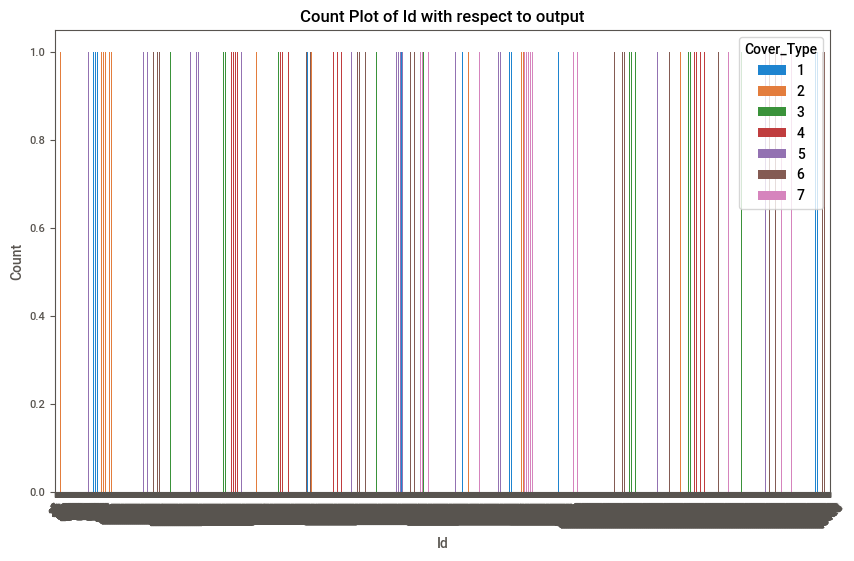

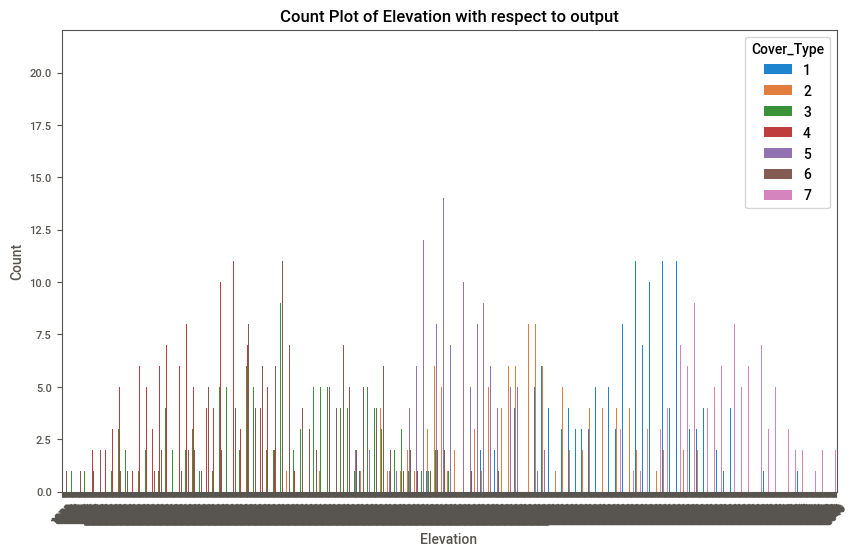

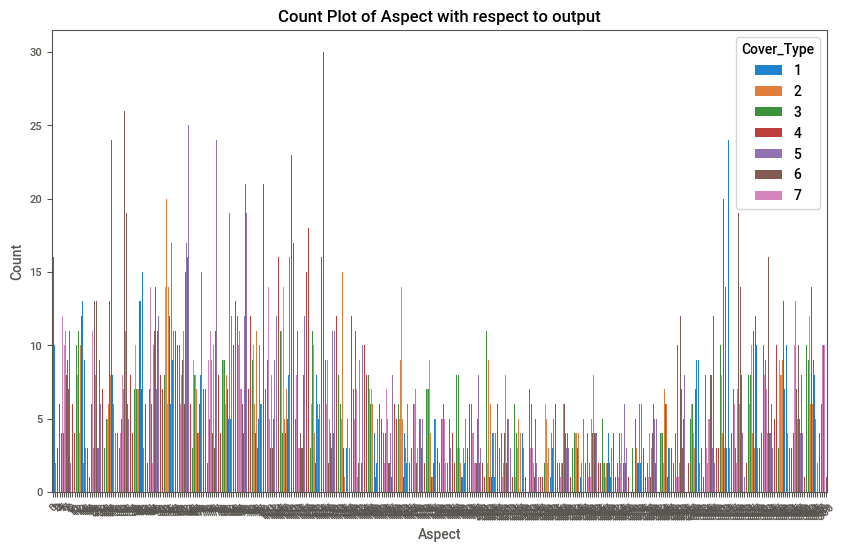

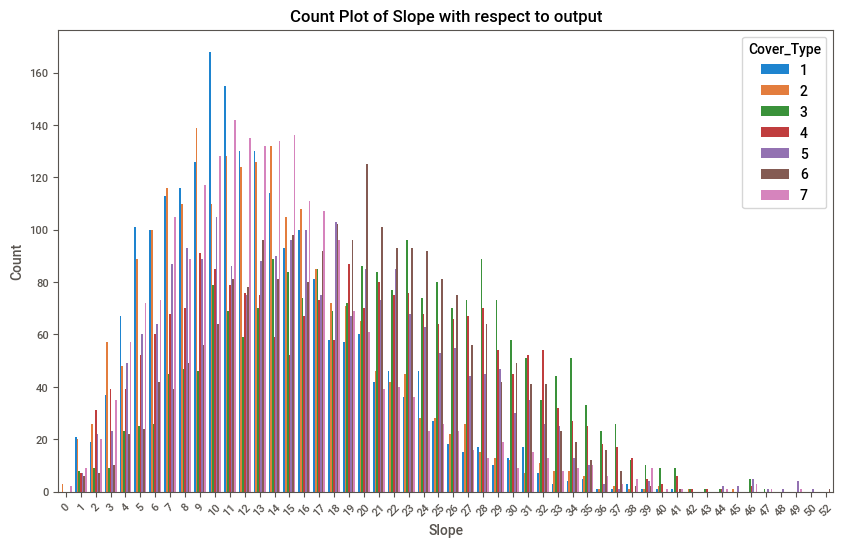

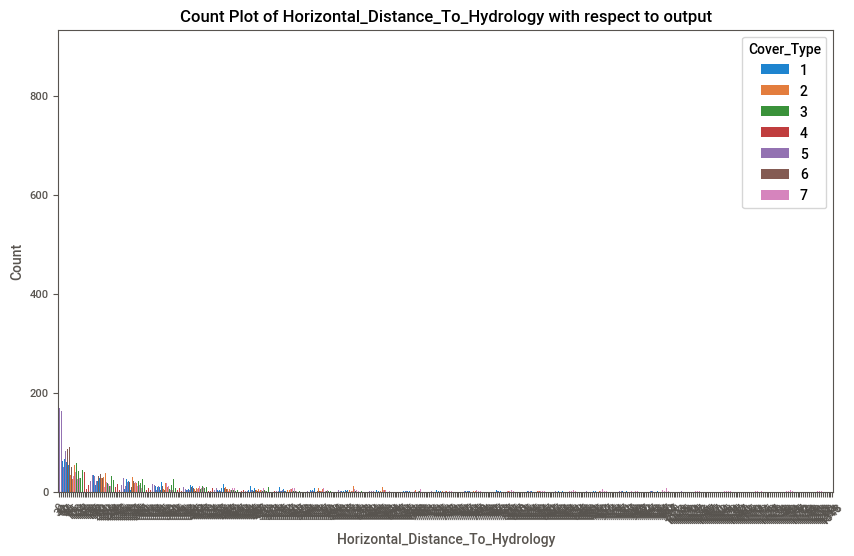

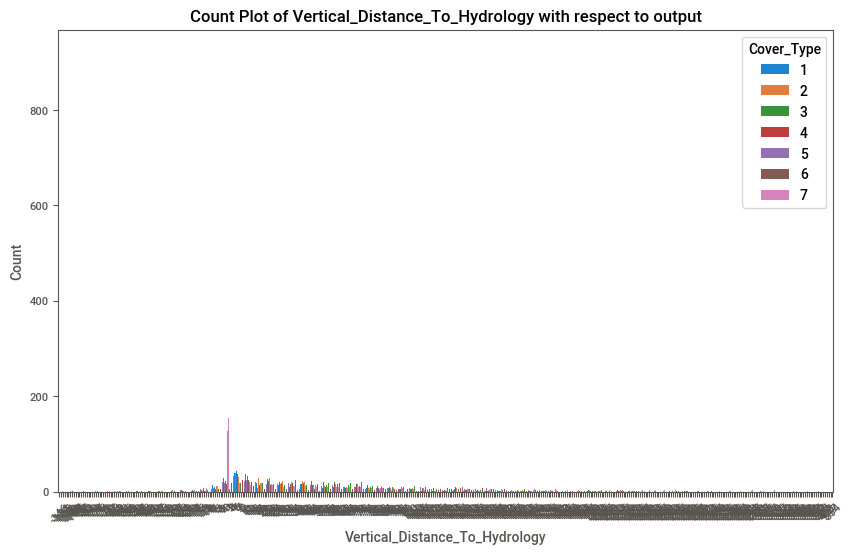

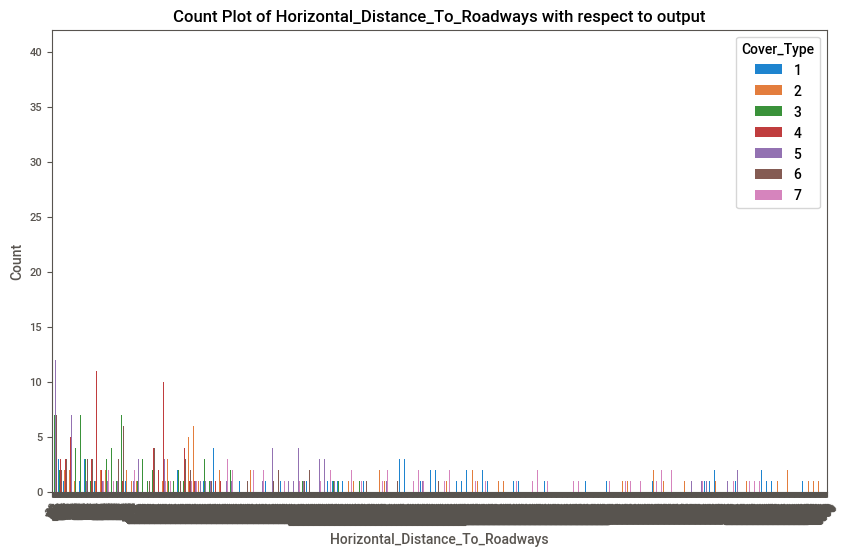

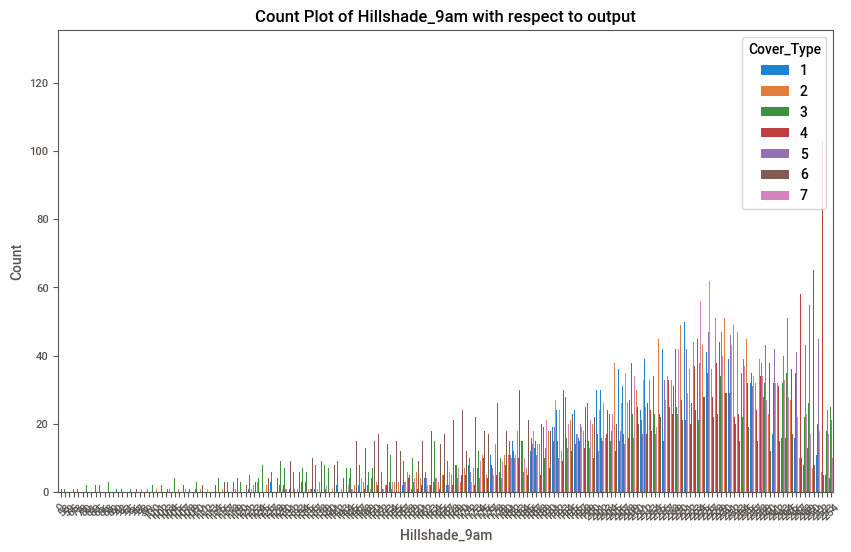

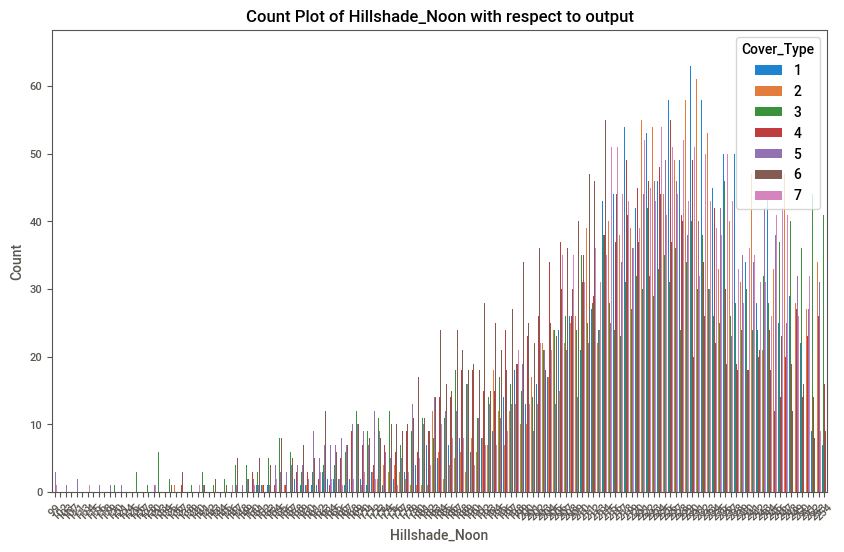

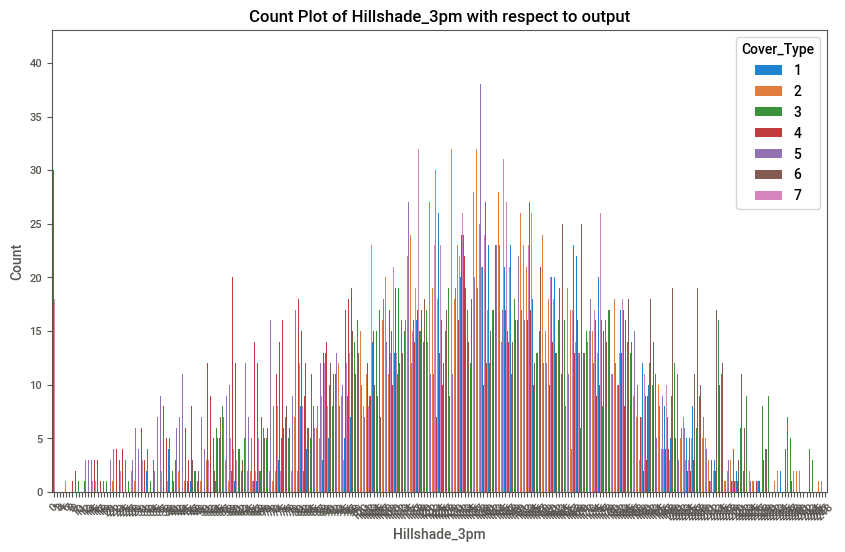

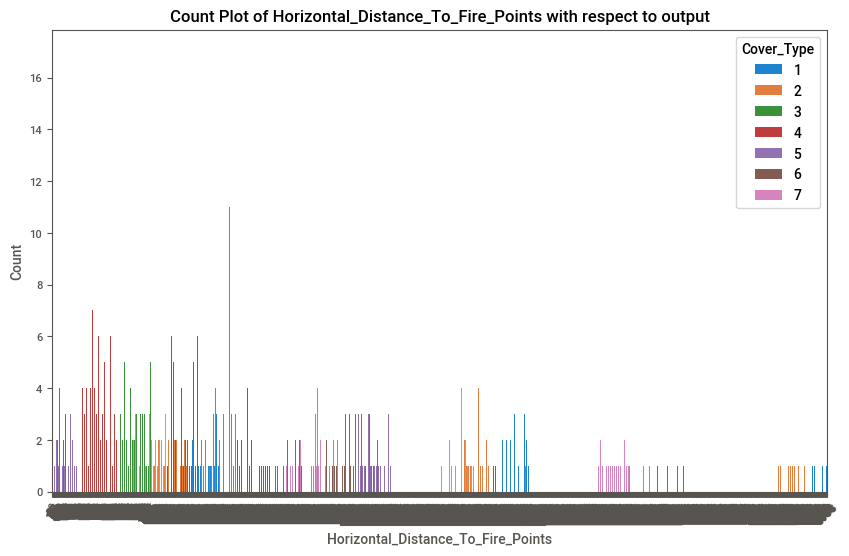

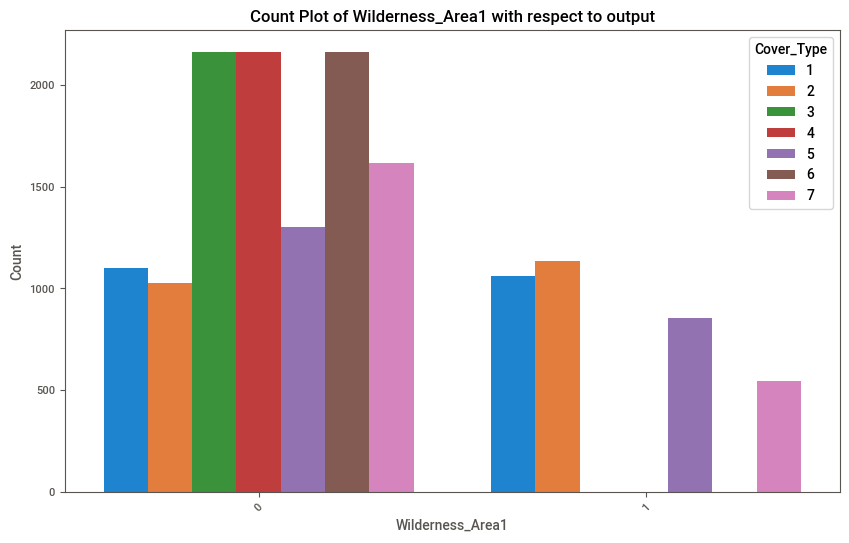

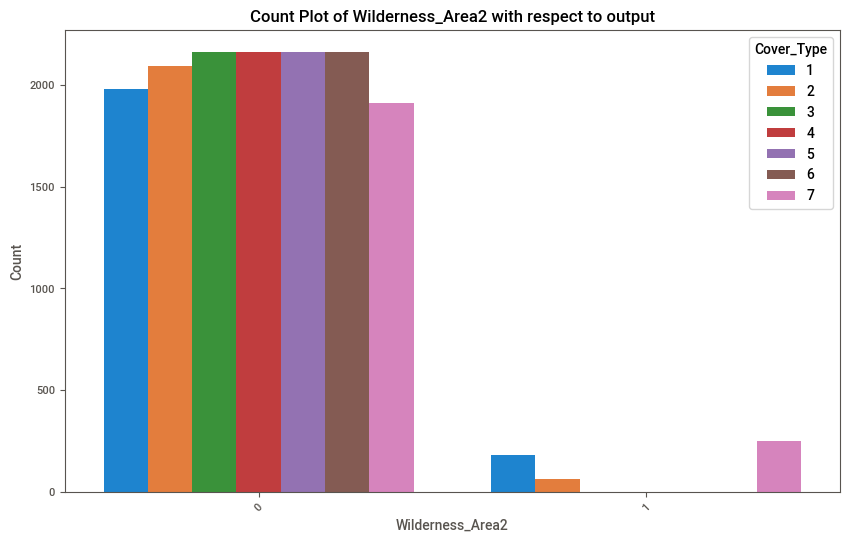

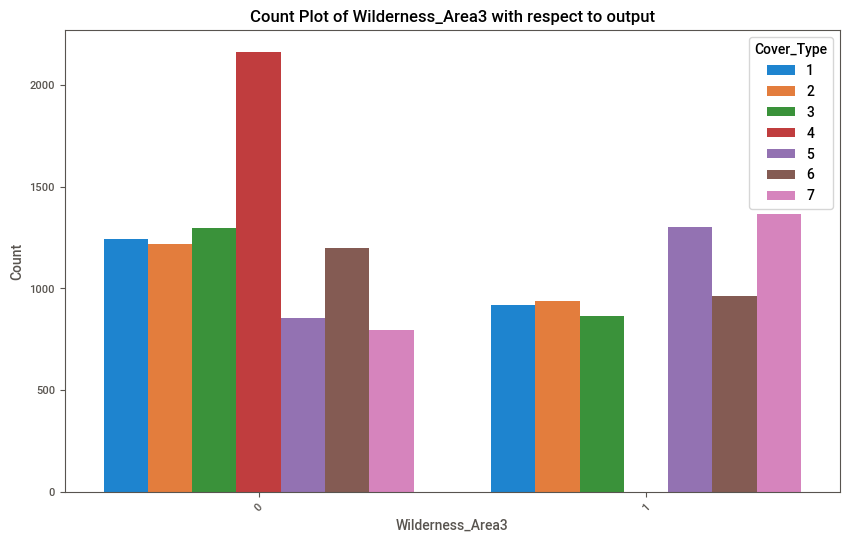

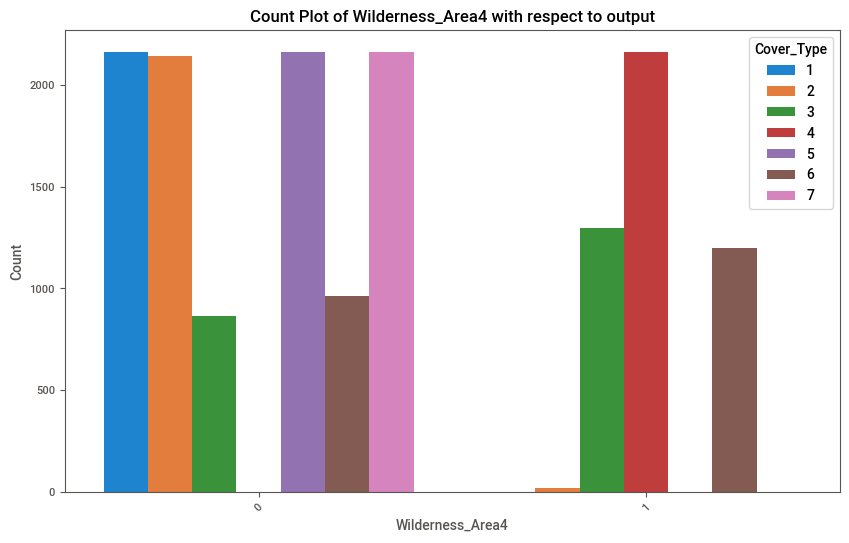

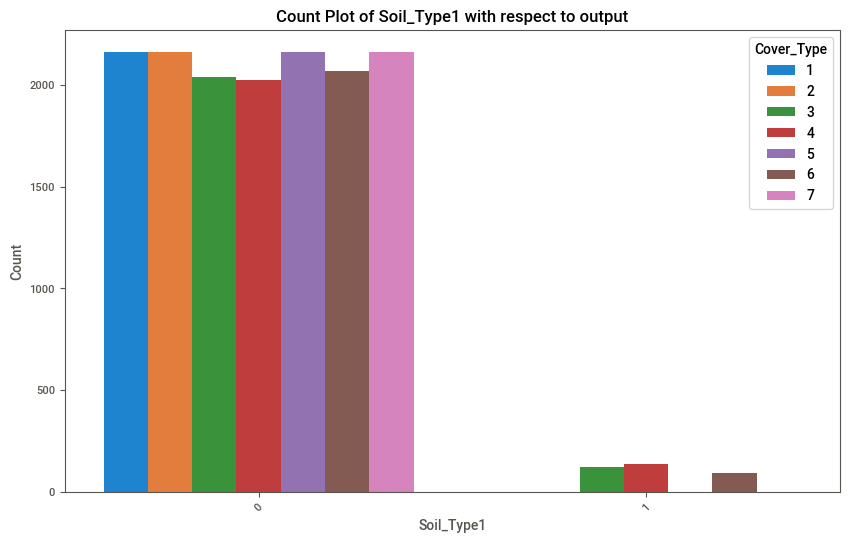

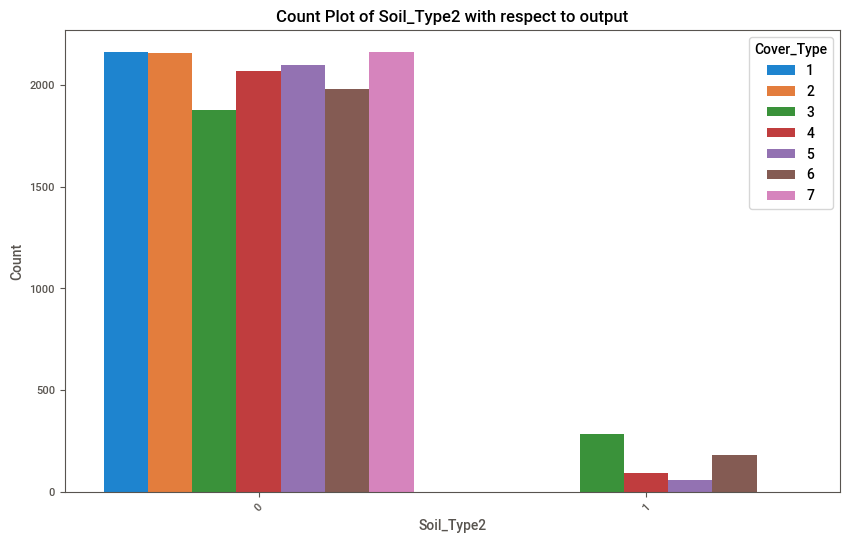

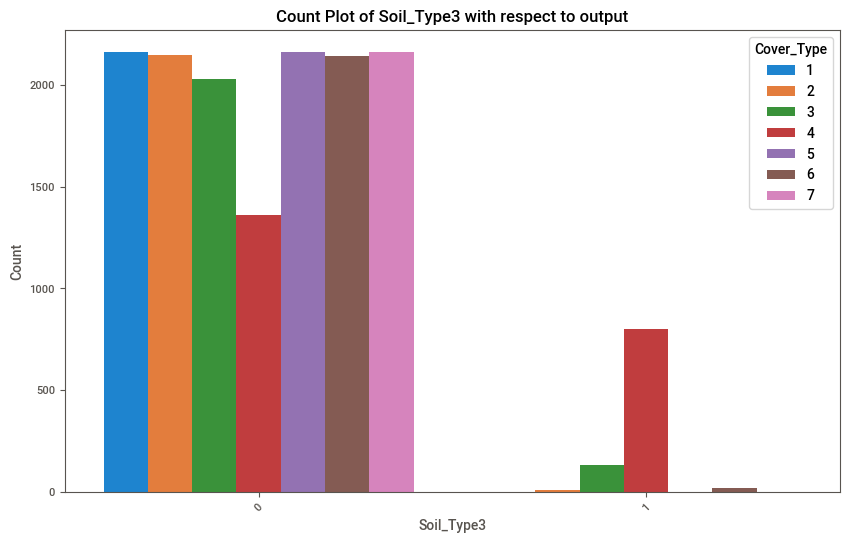

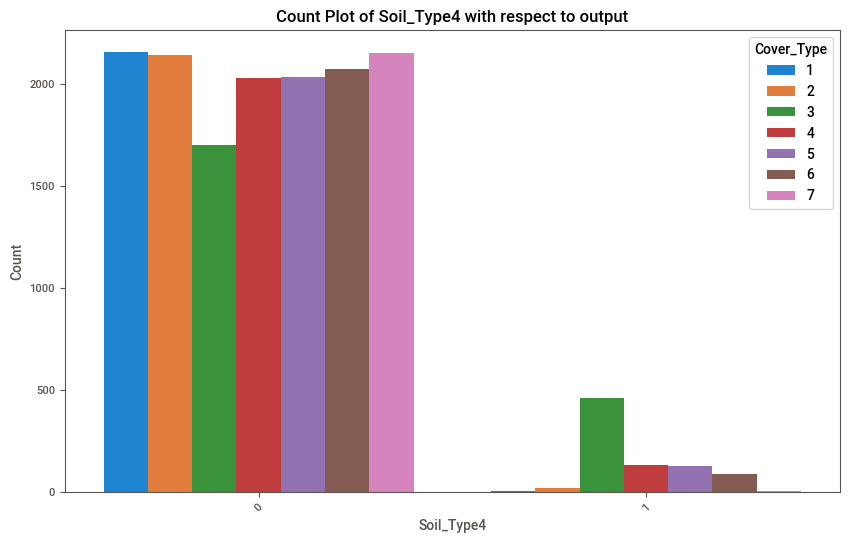

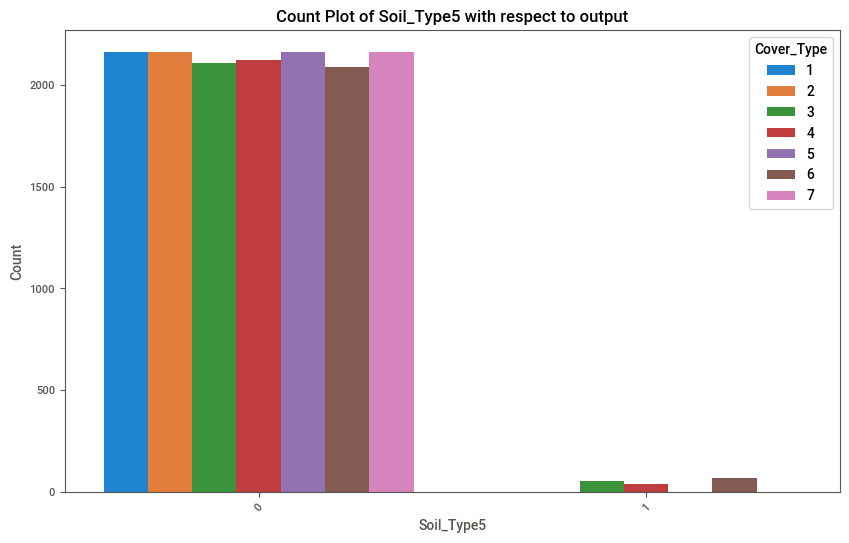

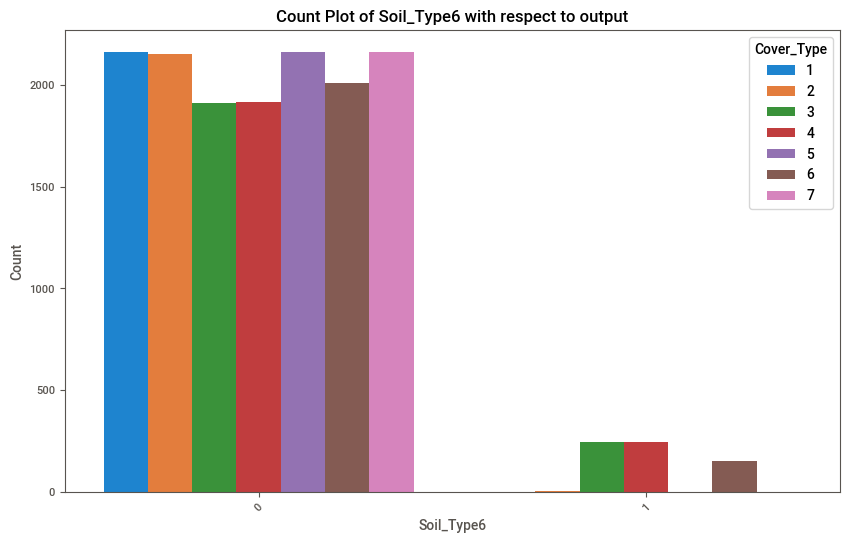

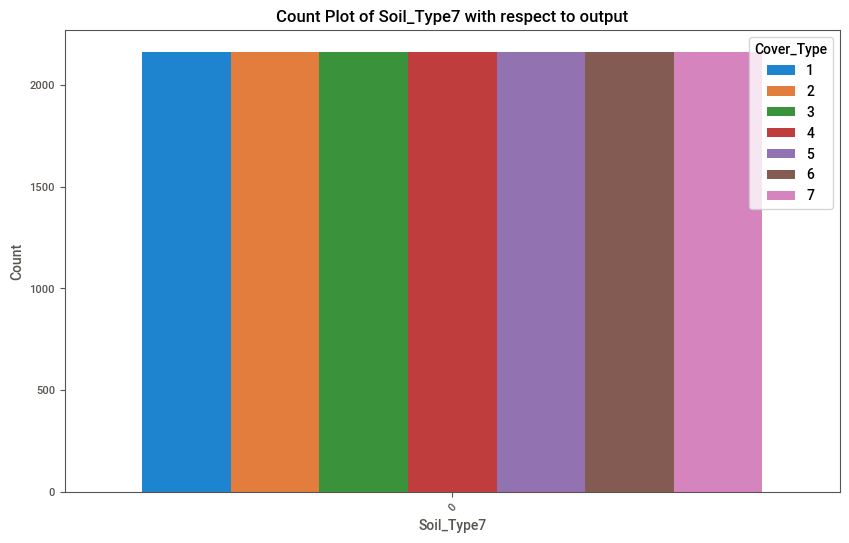

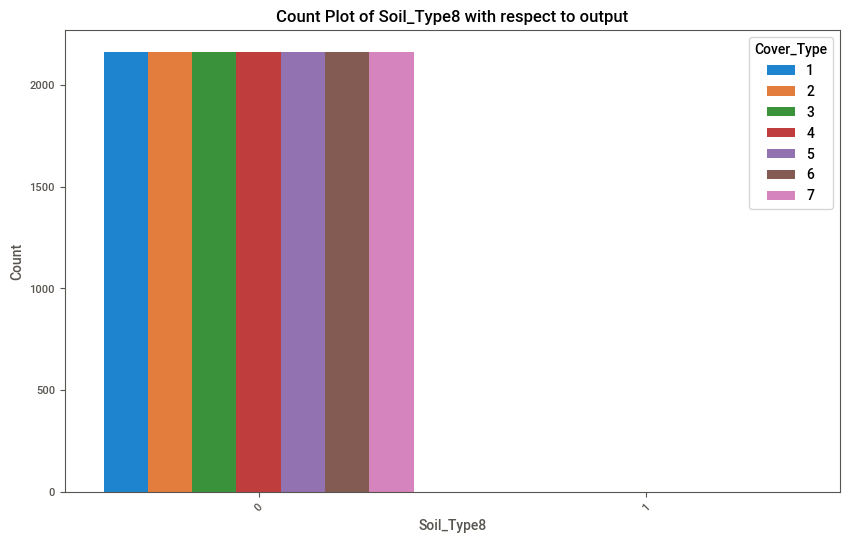

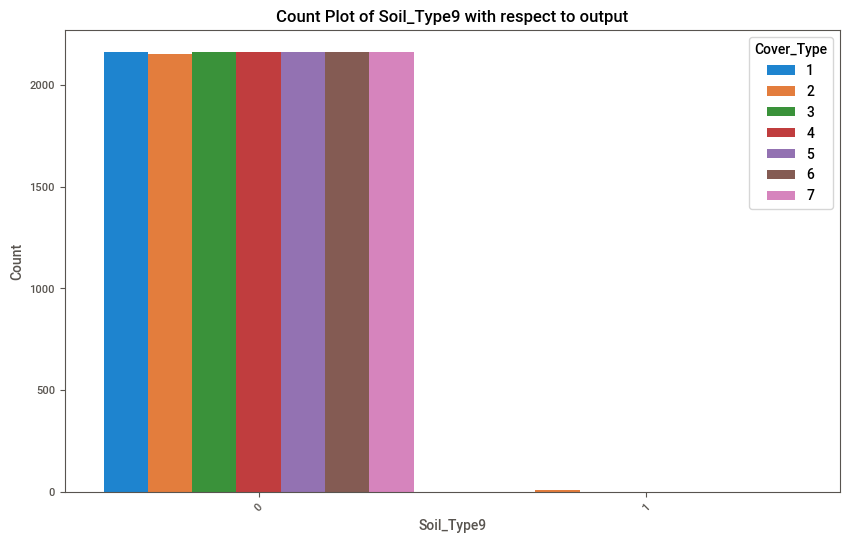

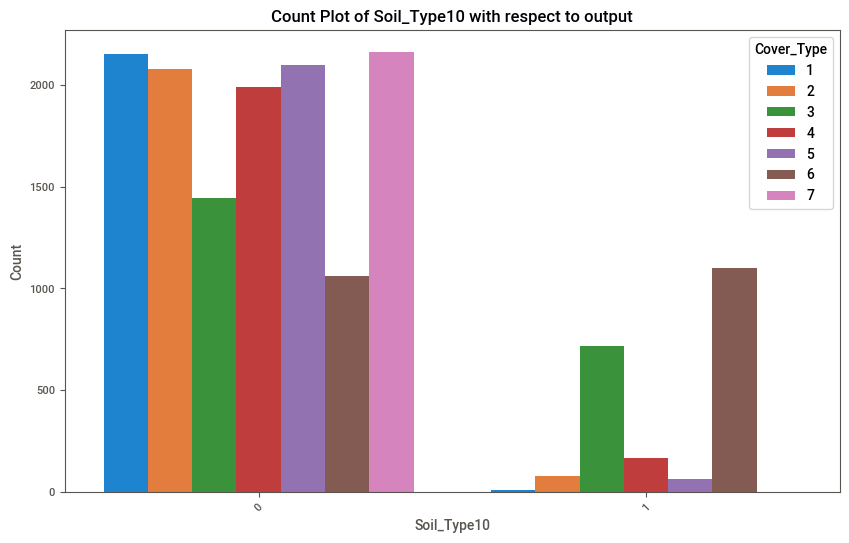

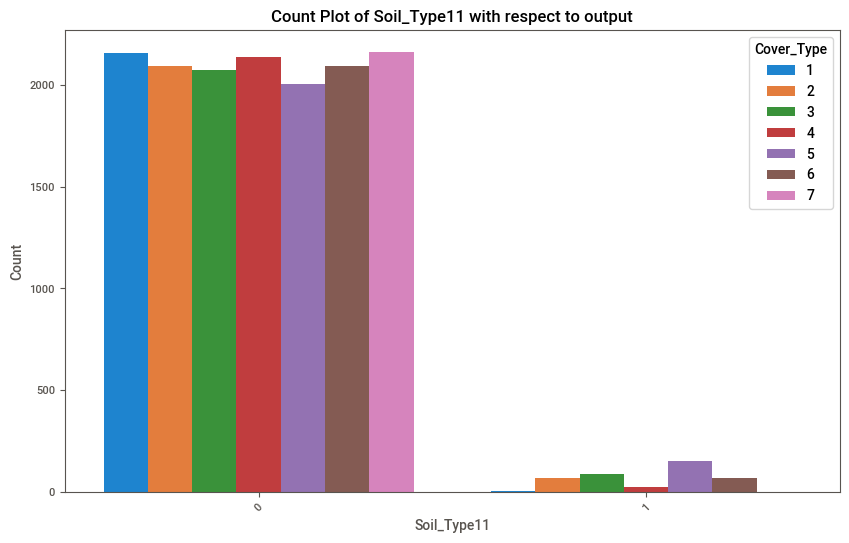

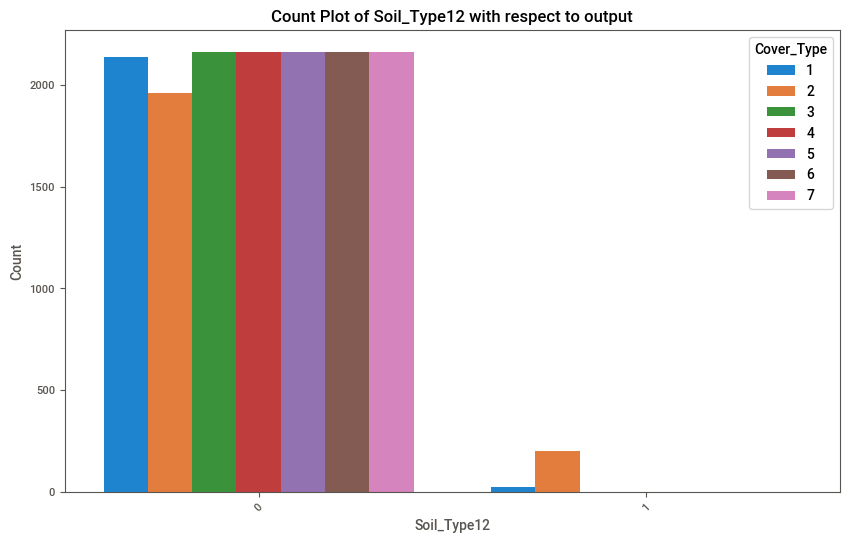

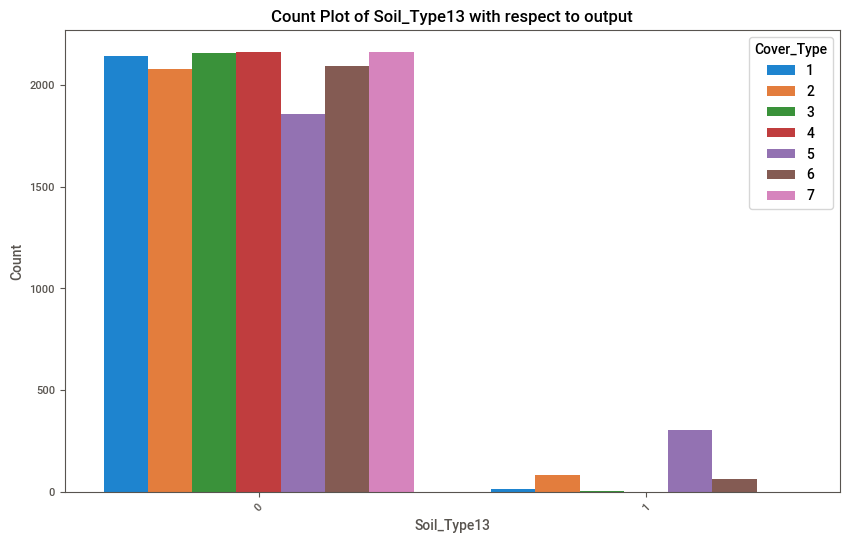

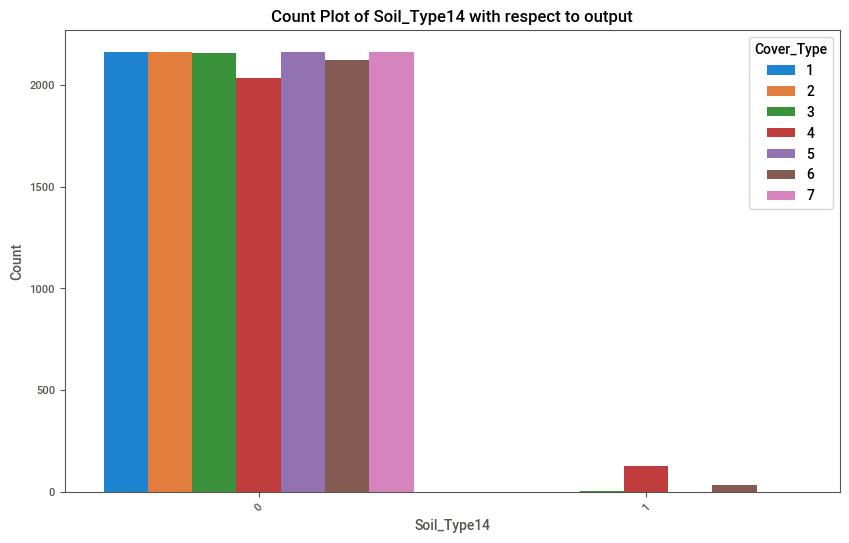

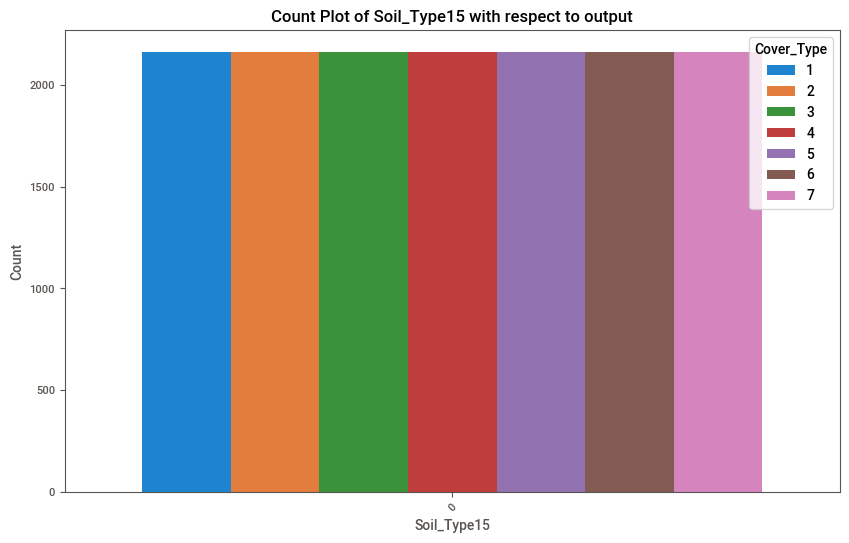

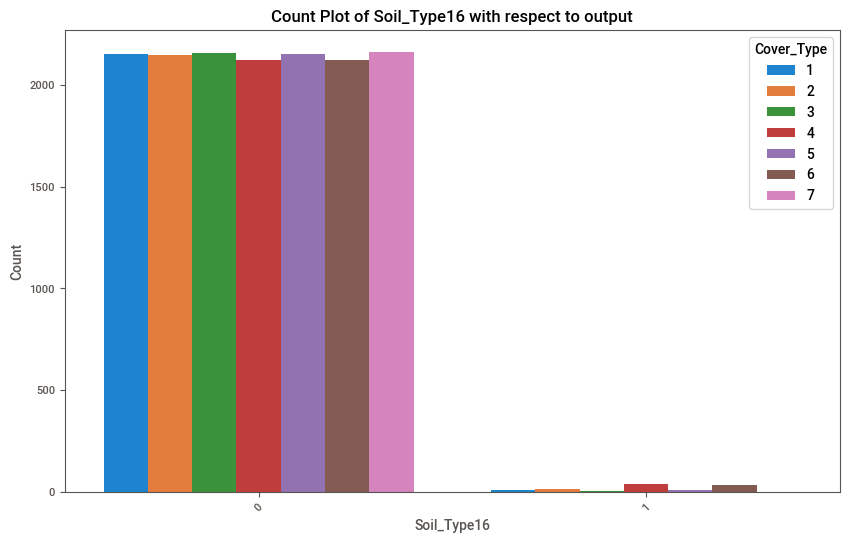

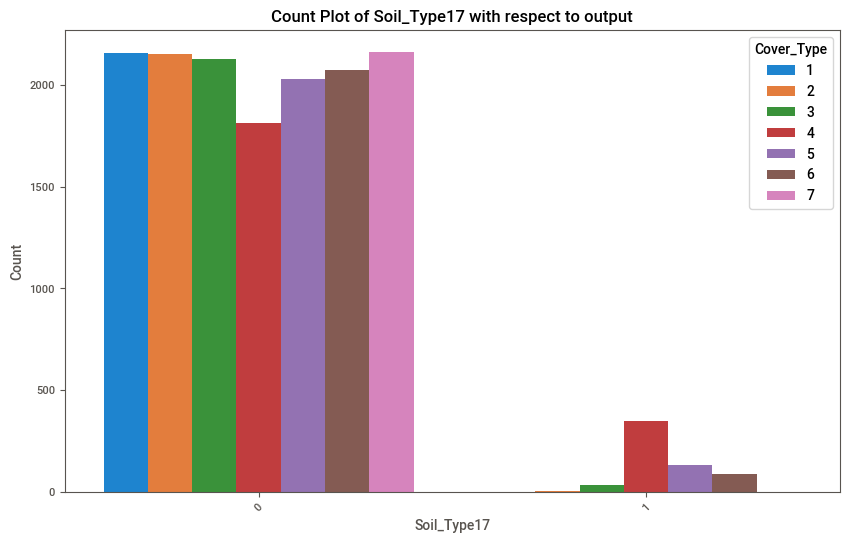

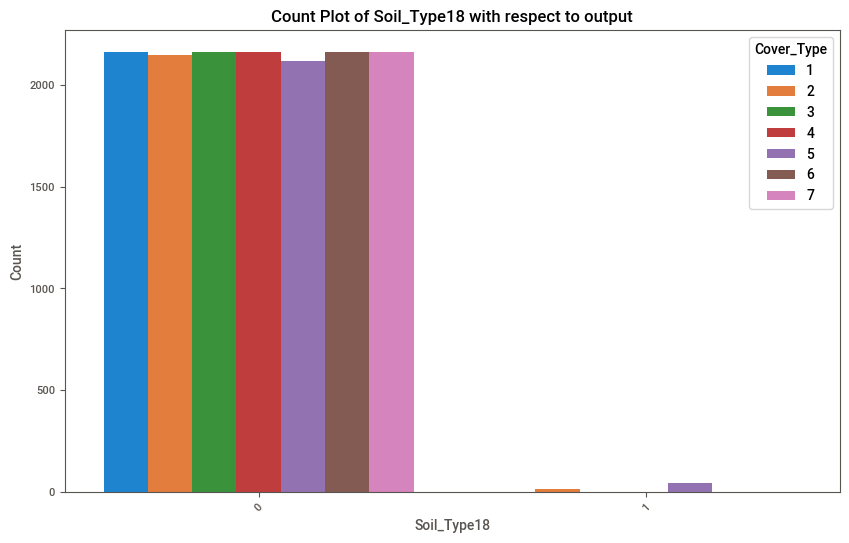

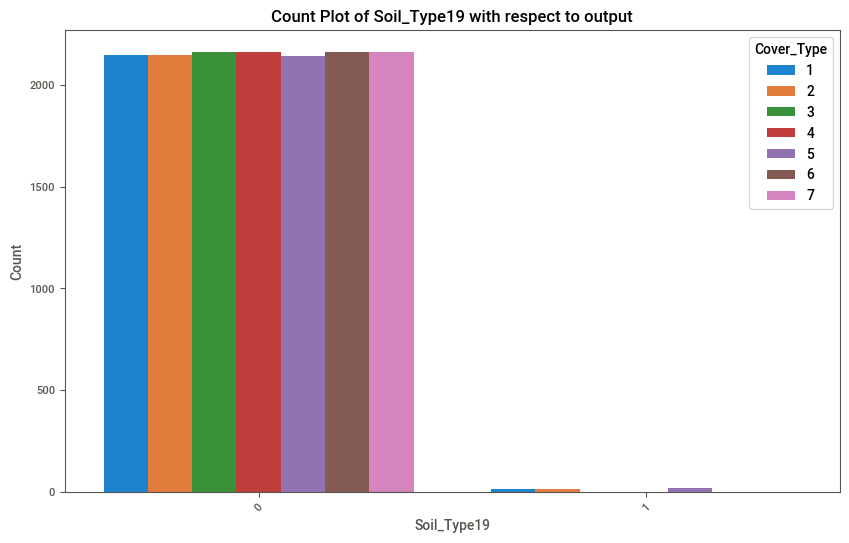

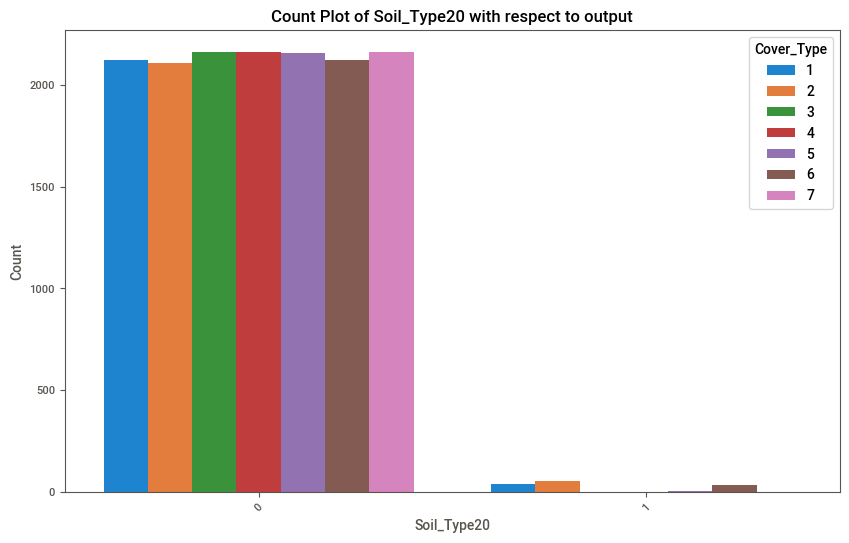

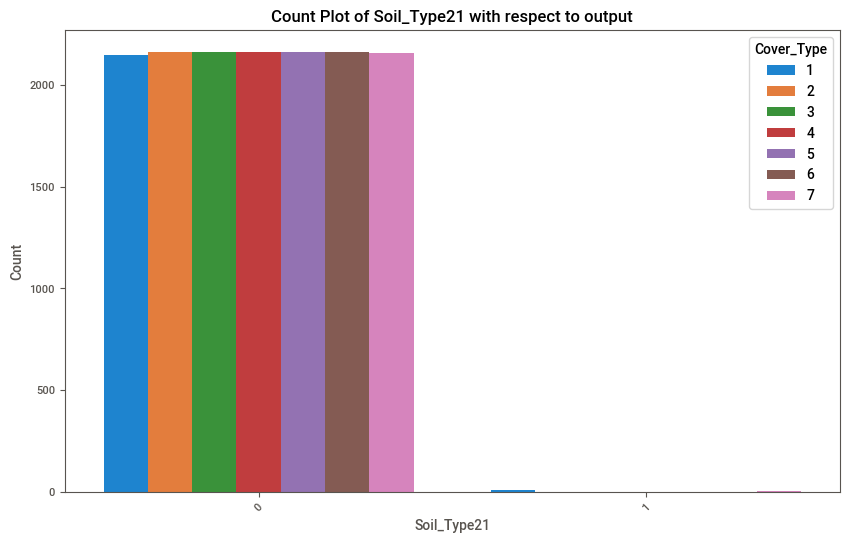

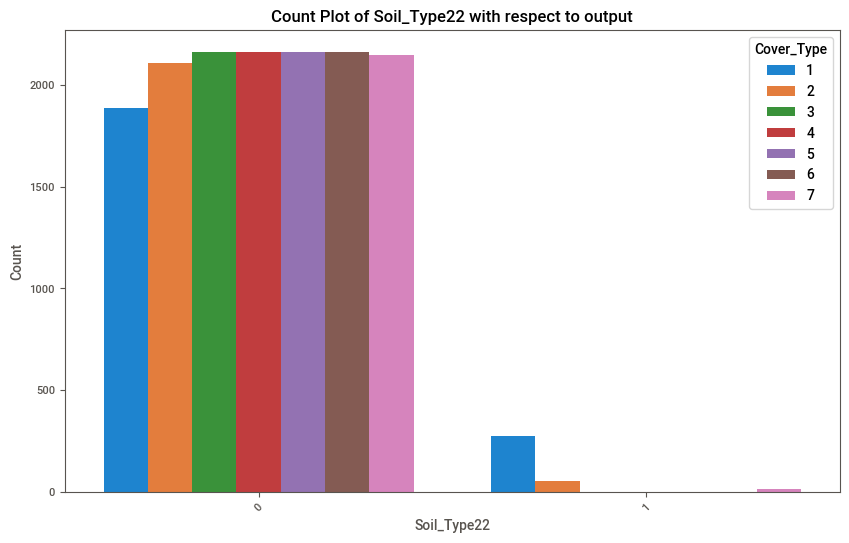

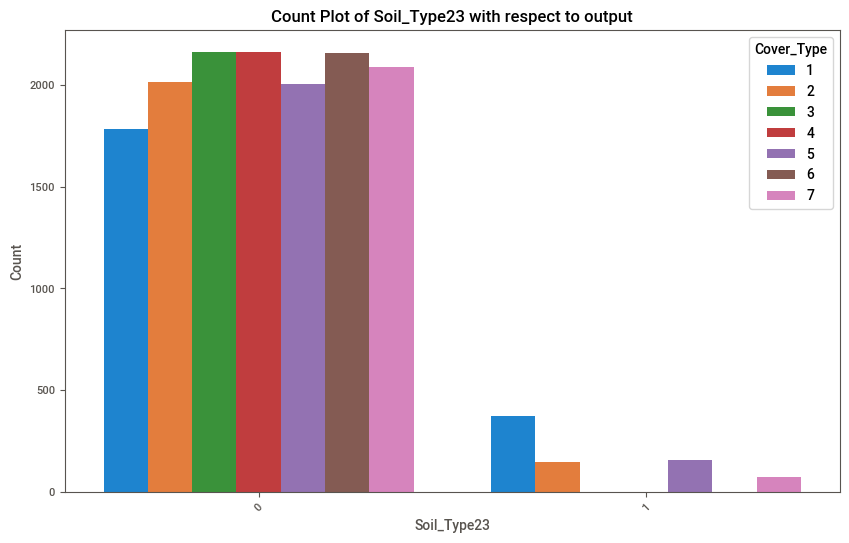

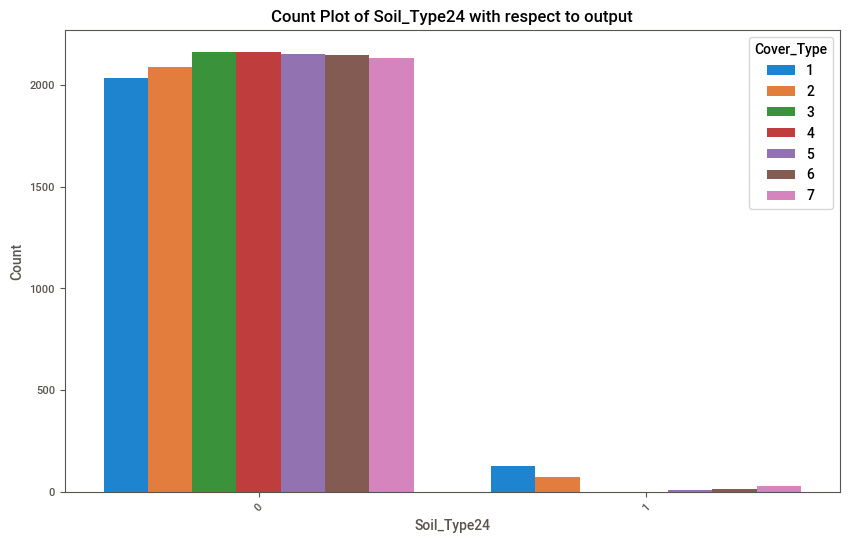

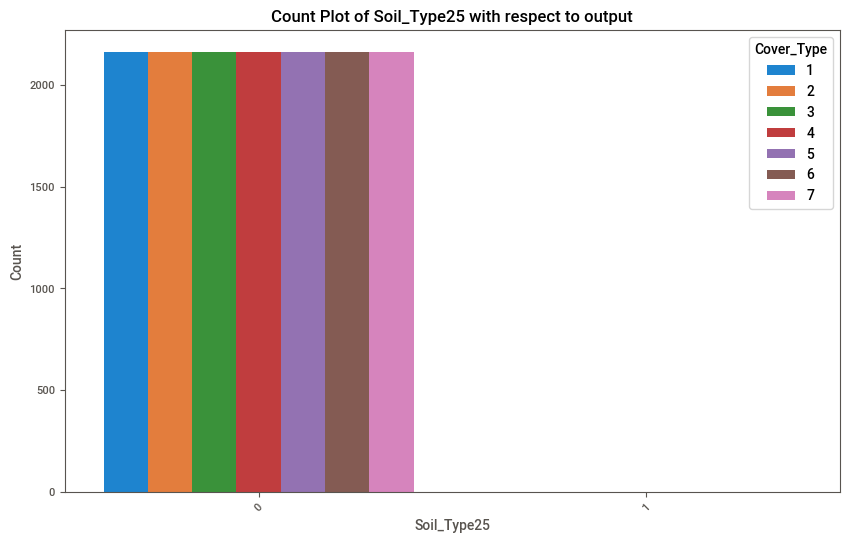

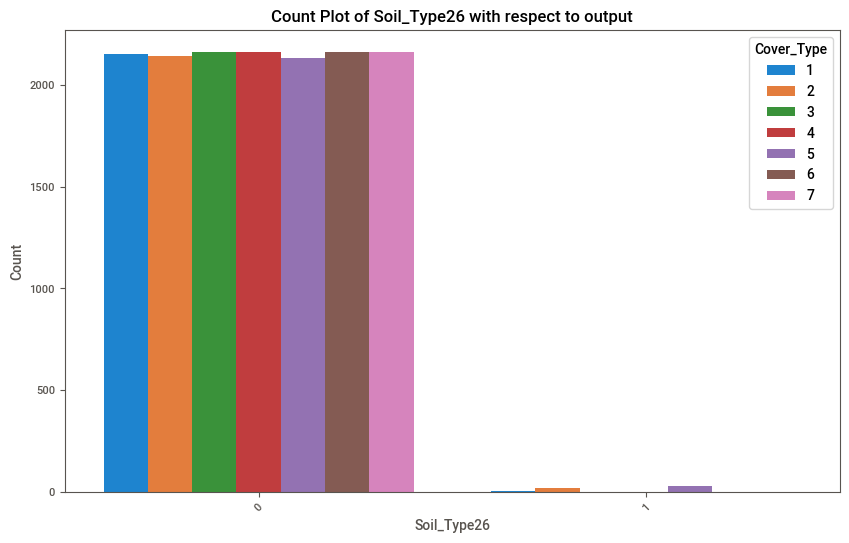

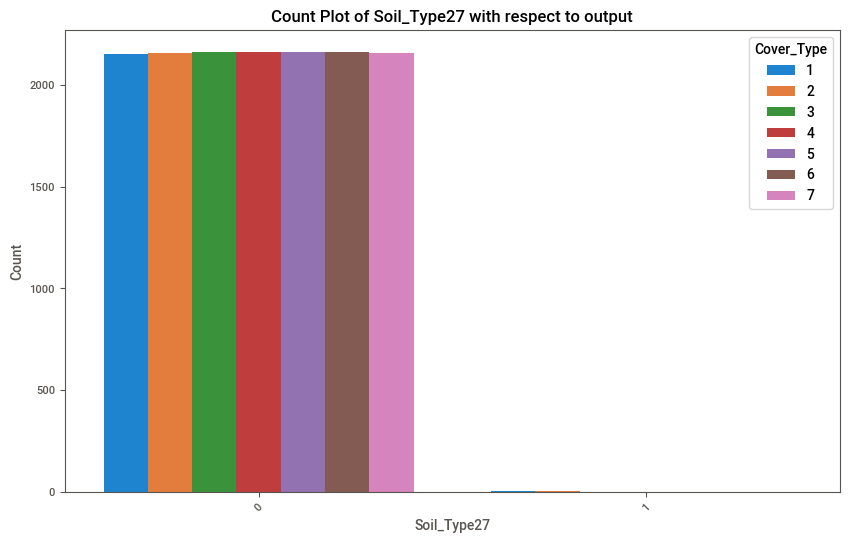

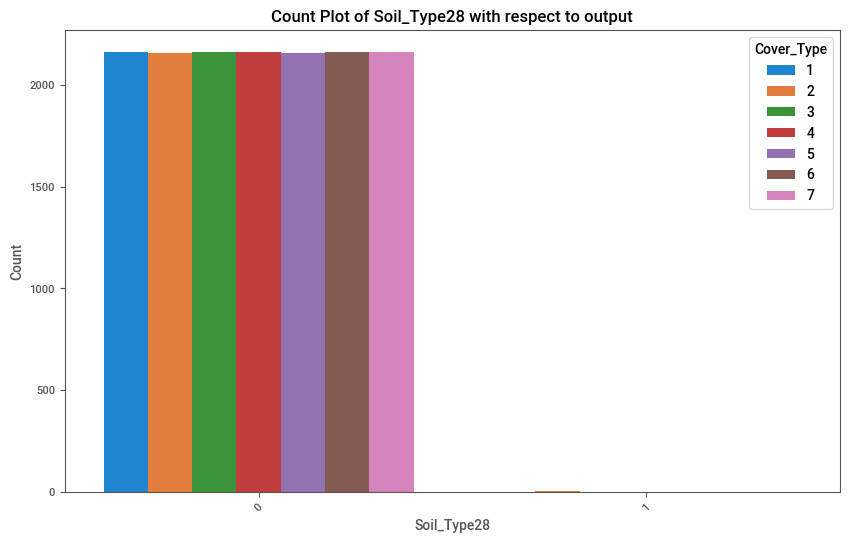

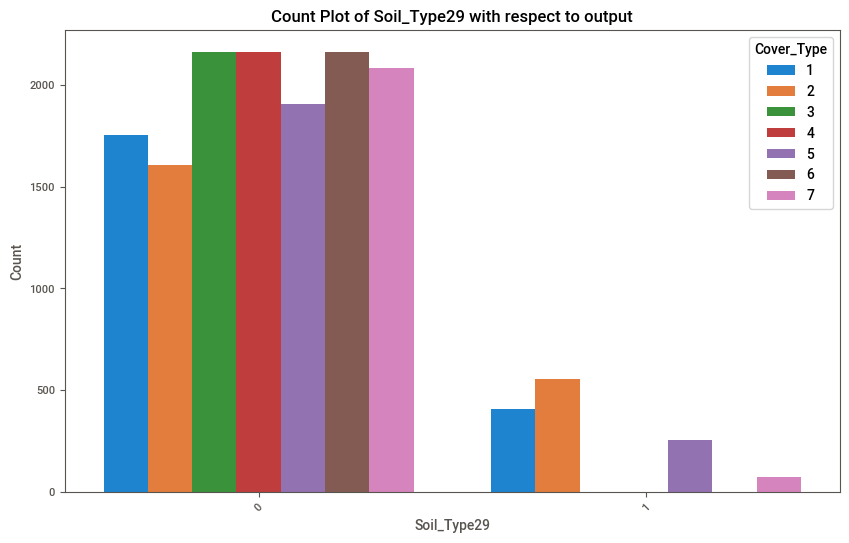

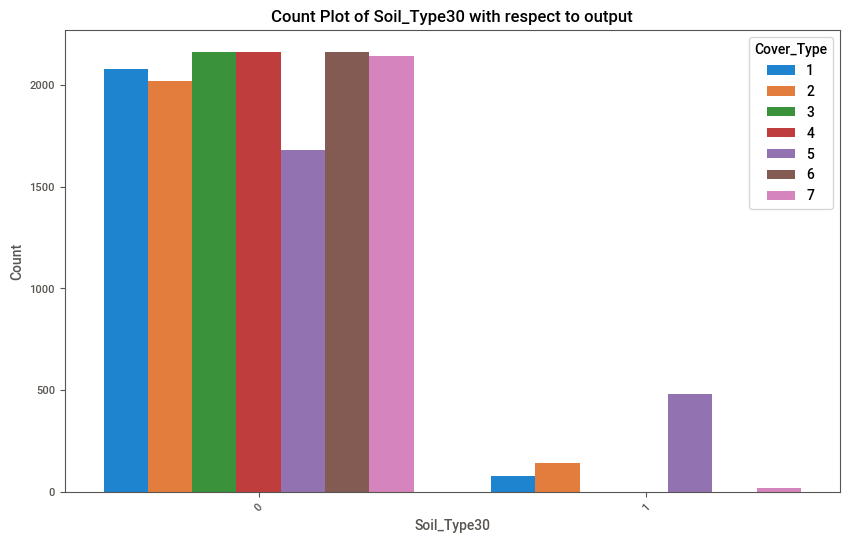

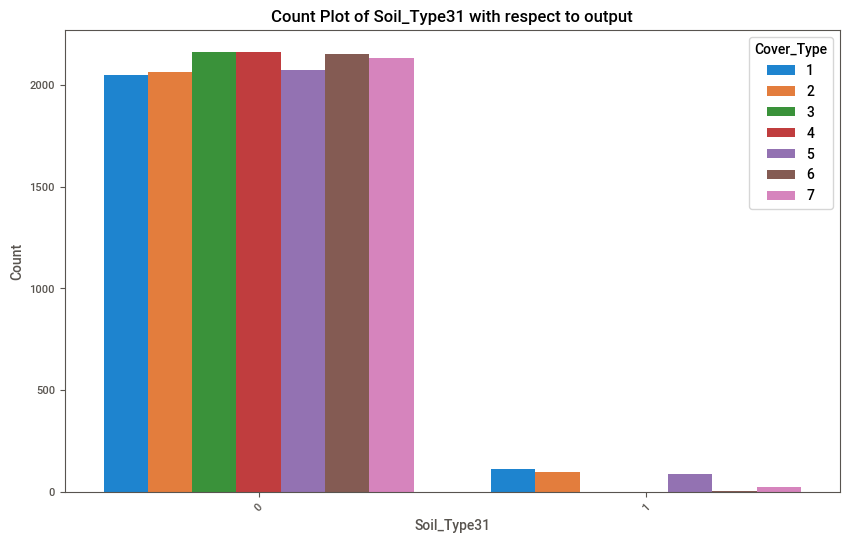

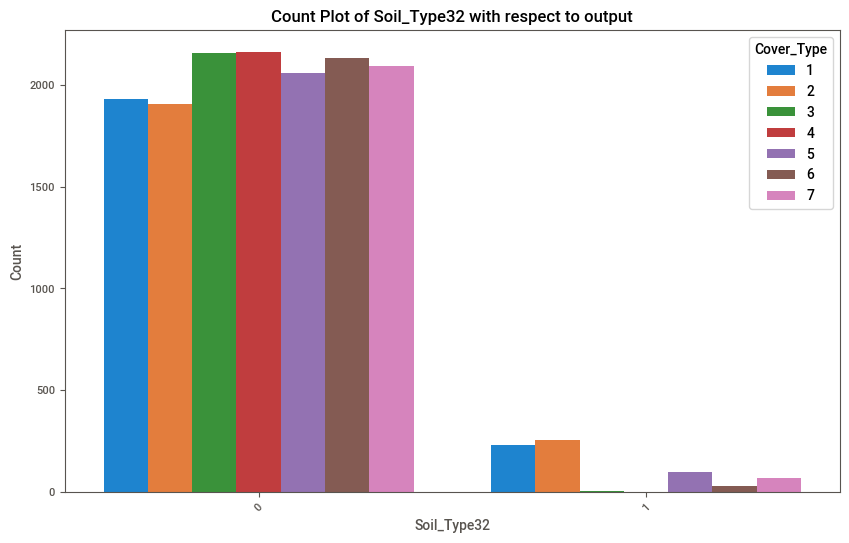

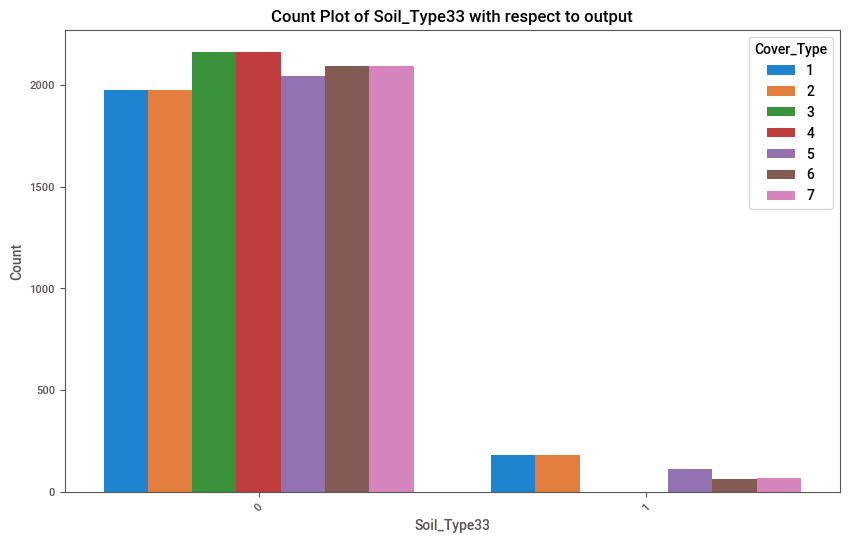

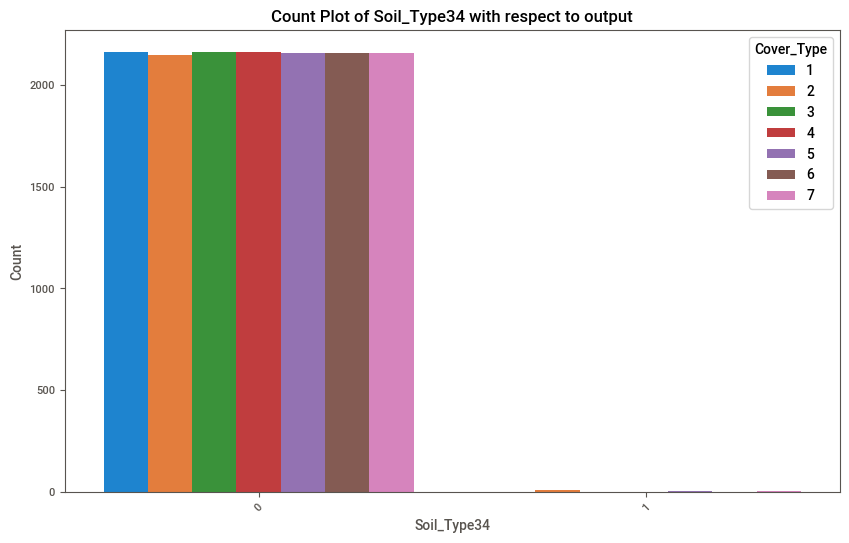

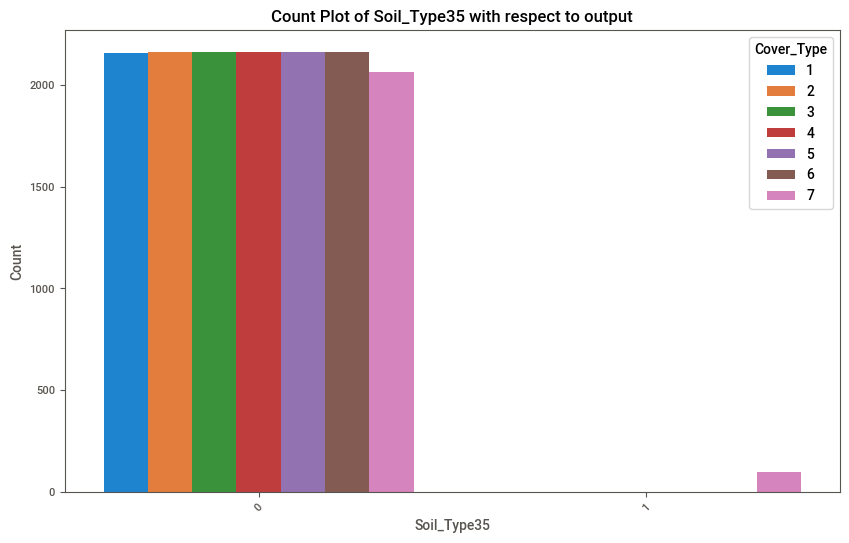

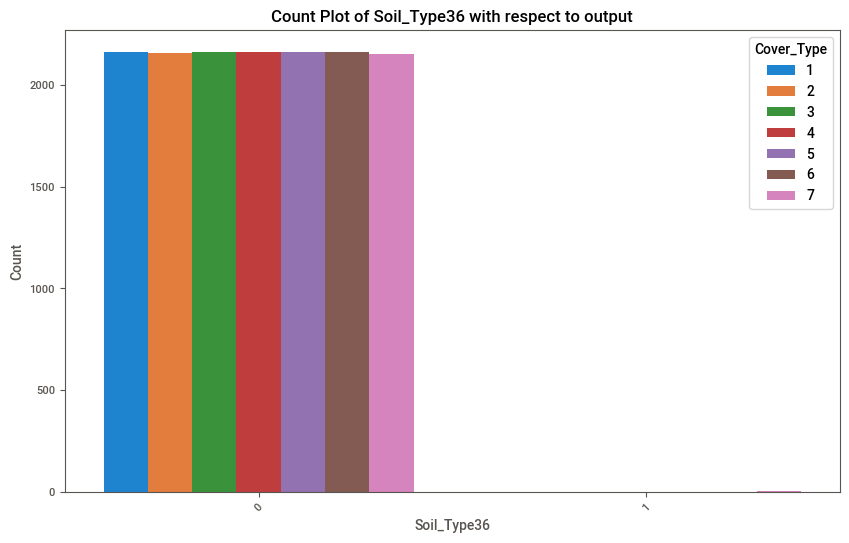

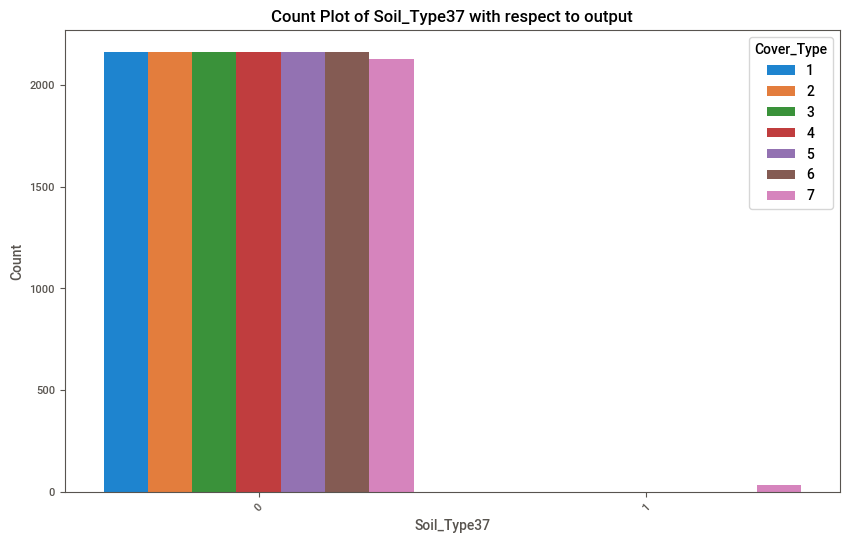

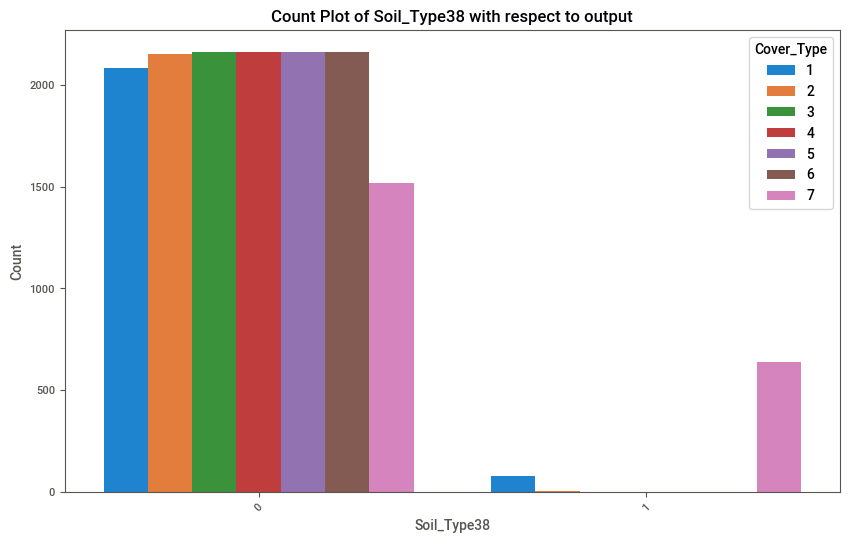

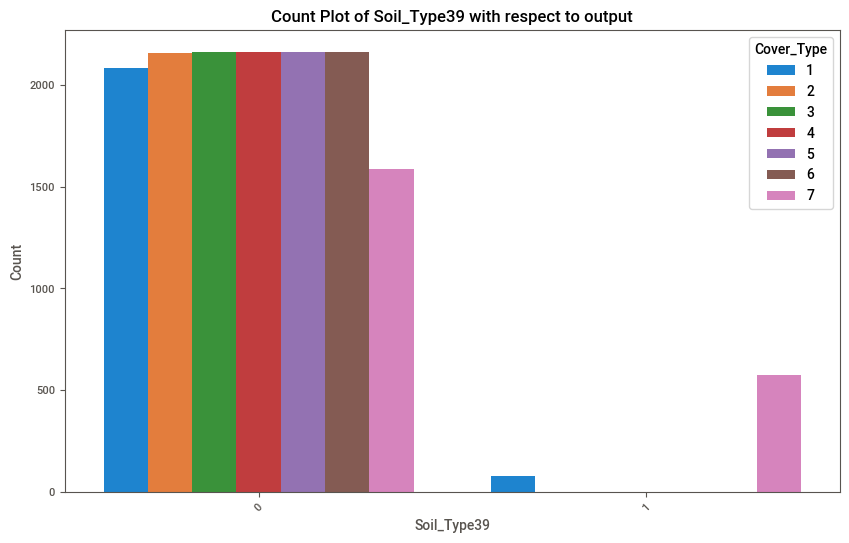

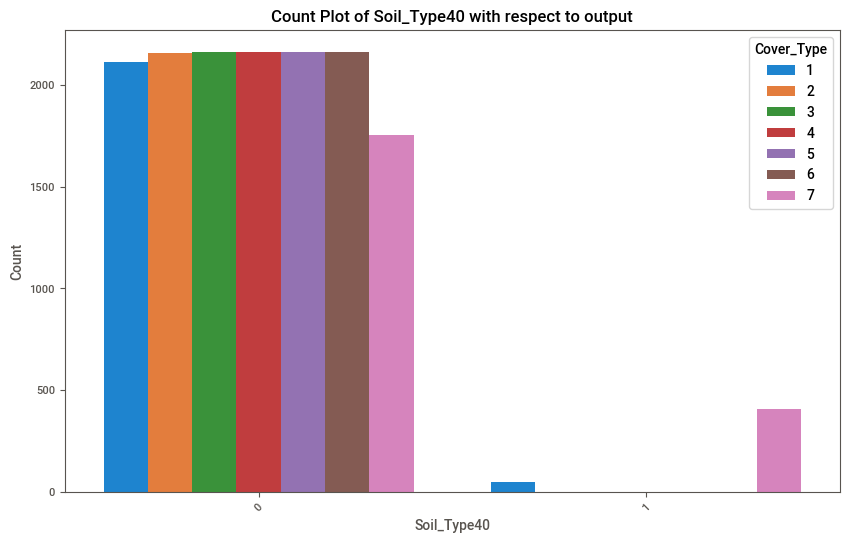

In [10]:
# Get the list of column names except for the target variable
columns = data.columns[data.columns != 'Cover_Type']

# Create count plots for each column with respect to the target variable
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Cover_Type', data=data)
    plt.title(f'Count Plot of {column} with respect to output')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Cover_Type', loc='upper right')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()


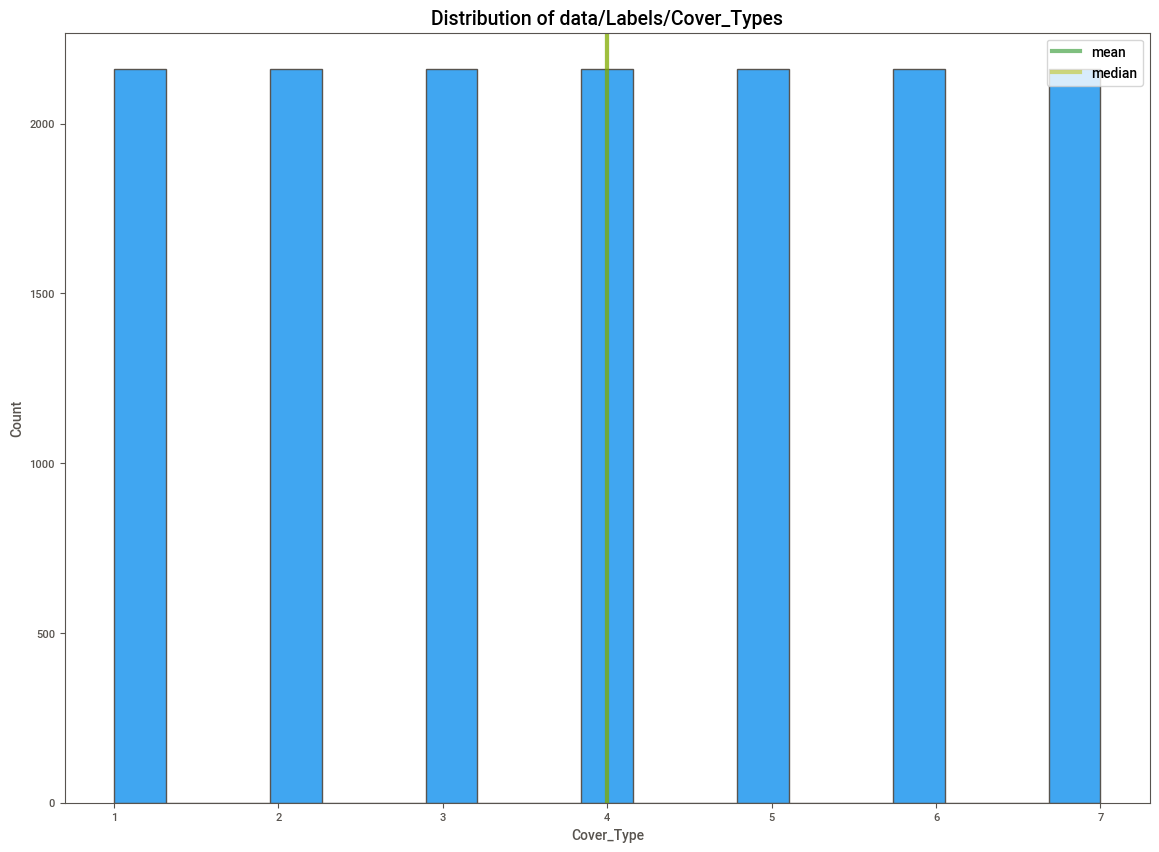

In [11]:

# Set the plot size
plt.figure(figsize=(14, 10))

# Plot histogram
sns.histplot(data["Cover_Type"], kde=False)

# Plot mean and median lines
plt.axvline(x=data["Cover_Type"].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data["Cover_Type"].median(), linewidth=3, color='y', label="median", alpha=0.5)

# Set title, labels, and legend
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of data/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

# Show plot
plt.show()


Distribution of data shows perfect uniform distribution.

Here are the 7 types of the forest type, numbered from 1 to 7 in the `Cover_Type` column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

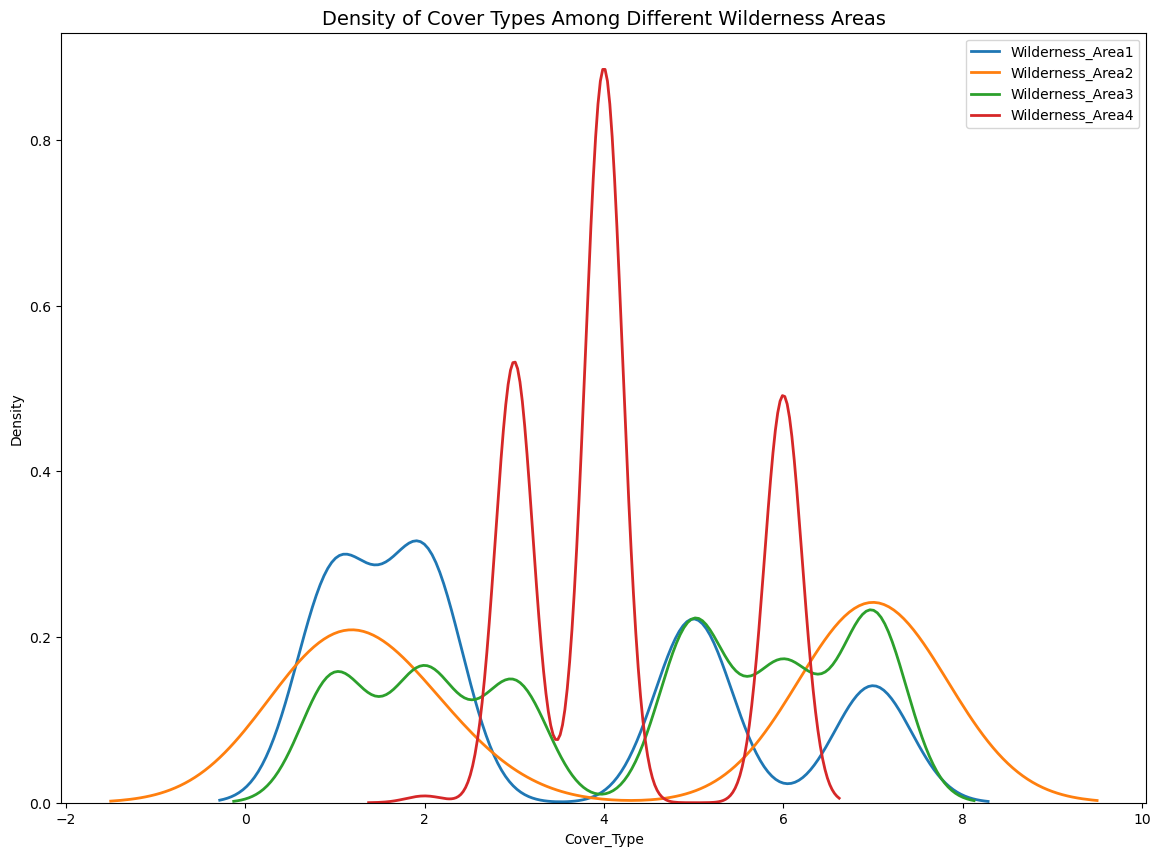

In [9]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
data['Wilderness_Area_Type'] = (data.iloc[:, 11:15] == 1).idxmax(axis=1)

# List of wilderness areas
wilderness_areas = sorted(data['Wilderness_Area_Type'].value_counts().index.tolist())

# Set the plot size
plt.figure(figsize=(14, 10))

# Plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = data[data['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# Set title, legends, and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)
plt.legend()

# Show plot
plt.show()


In [10]:
data

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type33  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type39  Soil_Type40  Cover_Type  Wilderness_Area_Type  
0                0            0           5      Wilderness_Area1  
1                0            0           5      Wilderness_Area1  
2                0            0           2      Wilderness_Area1  
3                0            0           2      Wilderness_Area1  
4                0            0           5      Wilderness_Area1  
...            ...          ...   

Another important finding about forest type: Wilderness area is an important feature to determine the cover type:
* Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7)  mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
* It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
* Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
* Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
* Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.

Note that, distribution of cover types extend more than the range because of the kernel density estimation.

##  Understanding the Soil_Type and Cover_Type relationship

* Since different soil types might appear in different wilderness areas, I am going to consider different wilderness areas while examining this relationship.

In [11]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [12]:
reverse_one_hot_encode(data, 16, 56, "Soil_Type")

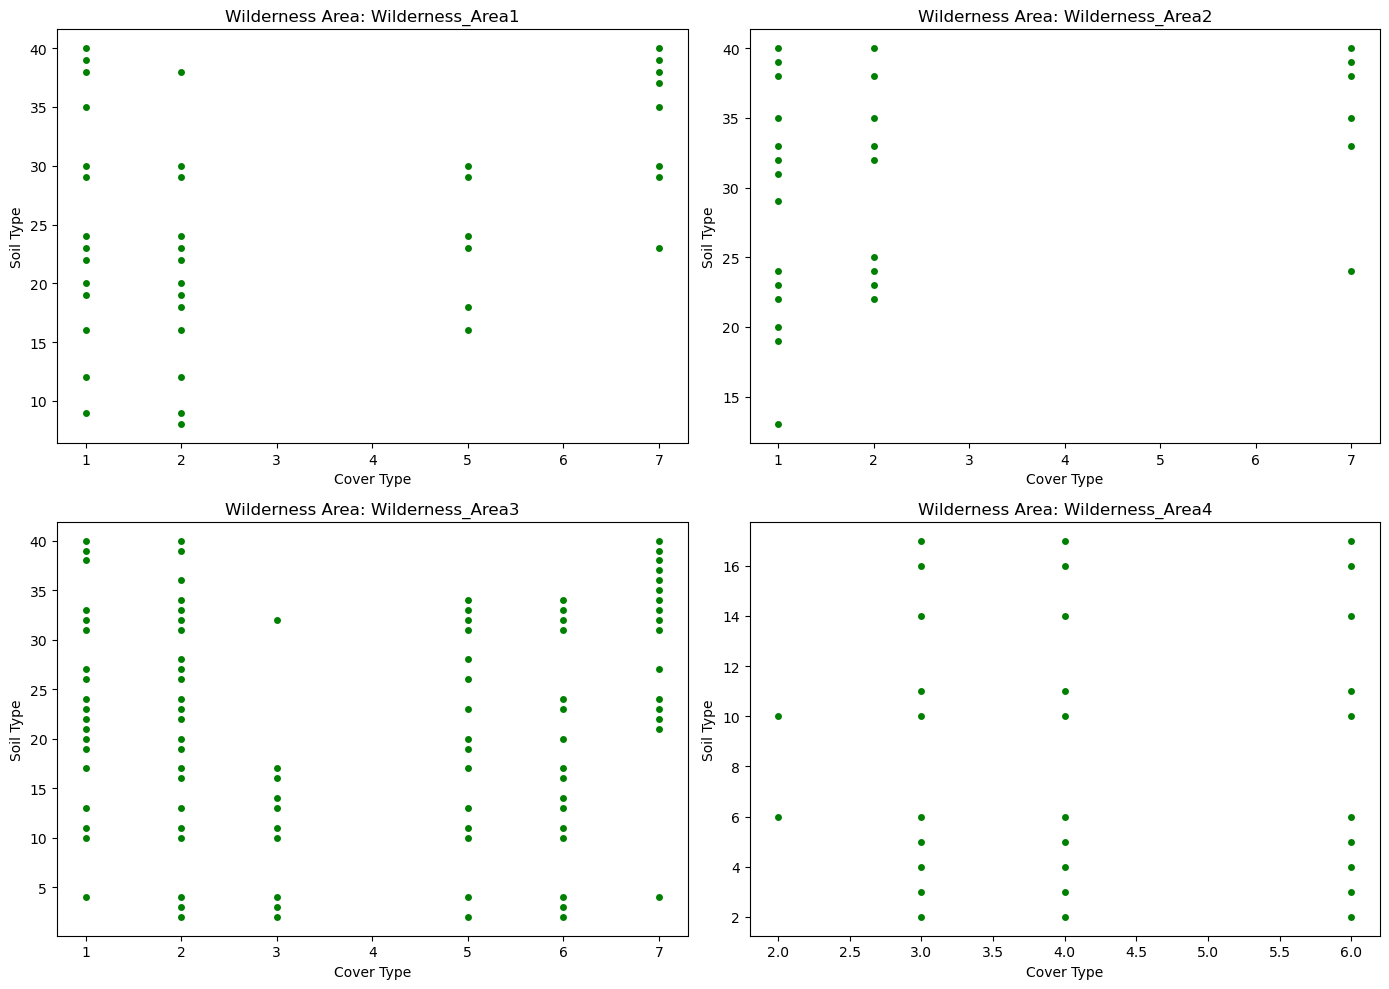

In [13]:
# Plot relationship of soil type and cover type among different wilderness areas
plt.figure(figsize=(14, 10))

# Iterate over each wilderness area
for i, area in enumerate(wilderness_areas):
    plt.subplot(2, 2, i+1)  # Create subplots for each wilderness area
    subset = data[data['Wilderness_Area_Type'] == area]
    plt.scatter(subset["Cover_Type"], subset["Soil_Type"], edgecolor="w", color="g")
    plt.title(f'Wilderness Area: {area}')
    plt.xlabel('Cover Type')
    plt.ylabel('Soil Type')

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


* Wilderness Area 3 is more diverse in soil type and cover type.
* Only soil types 1 through 20 is represented in Wilderss Area 4, thus cover types in that area grew with them.
* Cover type 7 seems to grow with soil types 25 through 40.
* Cover Type 5 and 6 can grow with most of the soil types.
* Cover Type 3 loves soil type 0 through 15.
* Cover Type 1 and 2 can grow with any soil type.

## Multivariate Analysis

In [60]:
#sns.pairplot(data)
#due to huge dataset, system i not supporting the pairplot so excluding this step.

In [14]:
# Store continuous variables in a list
continuous_variables = data.columns[1:11].tolist()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = x.corr(y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    



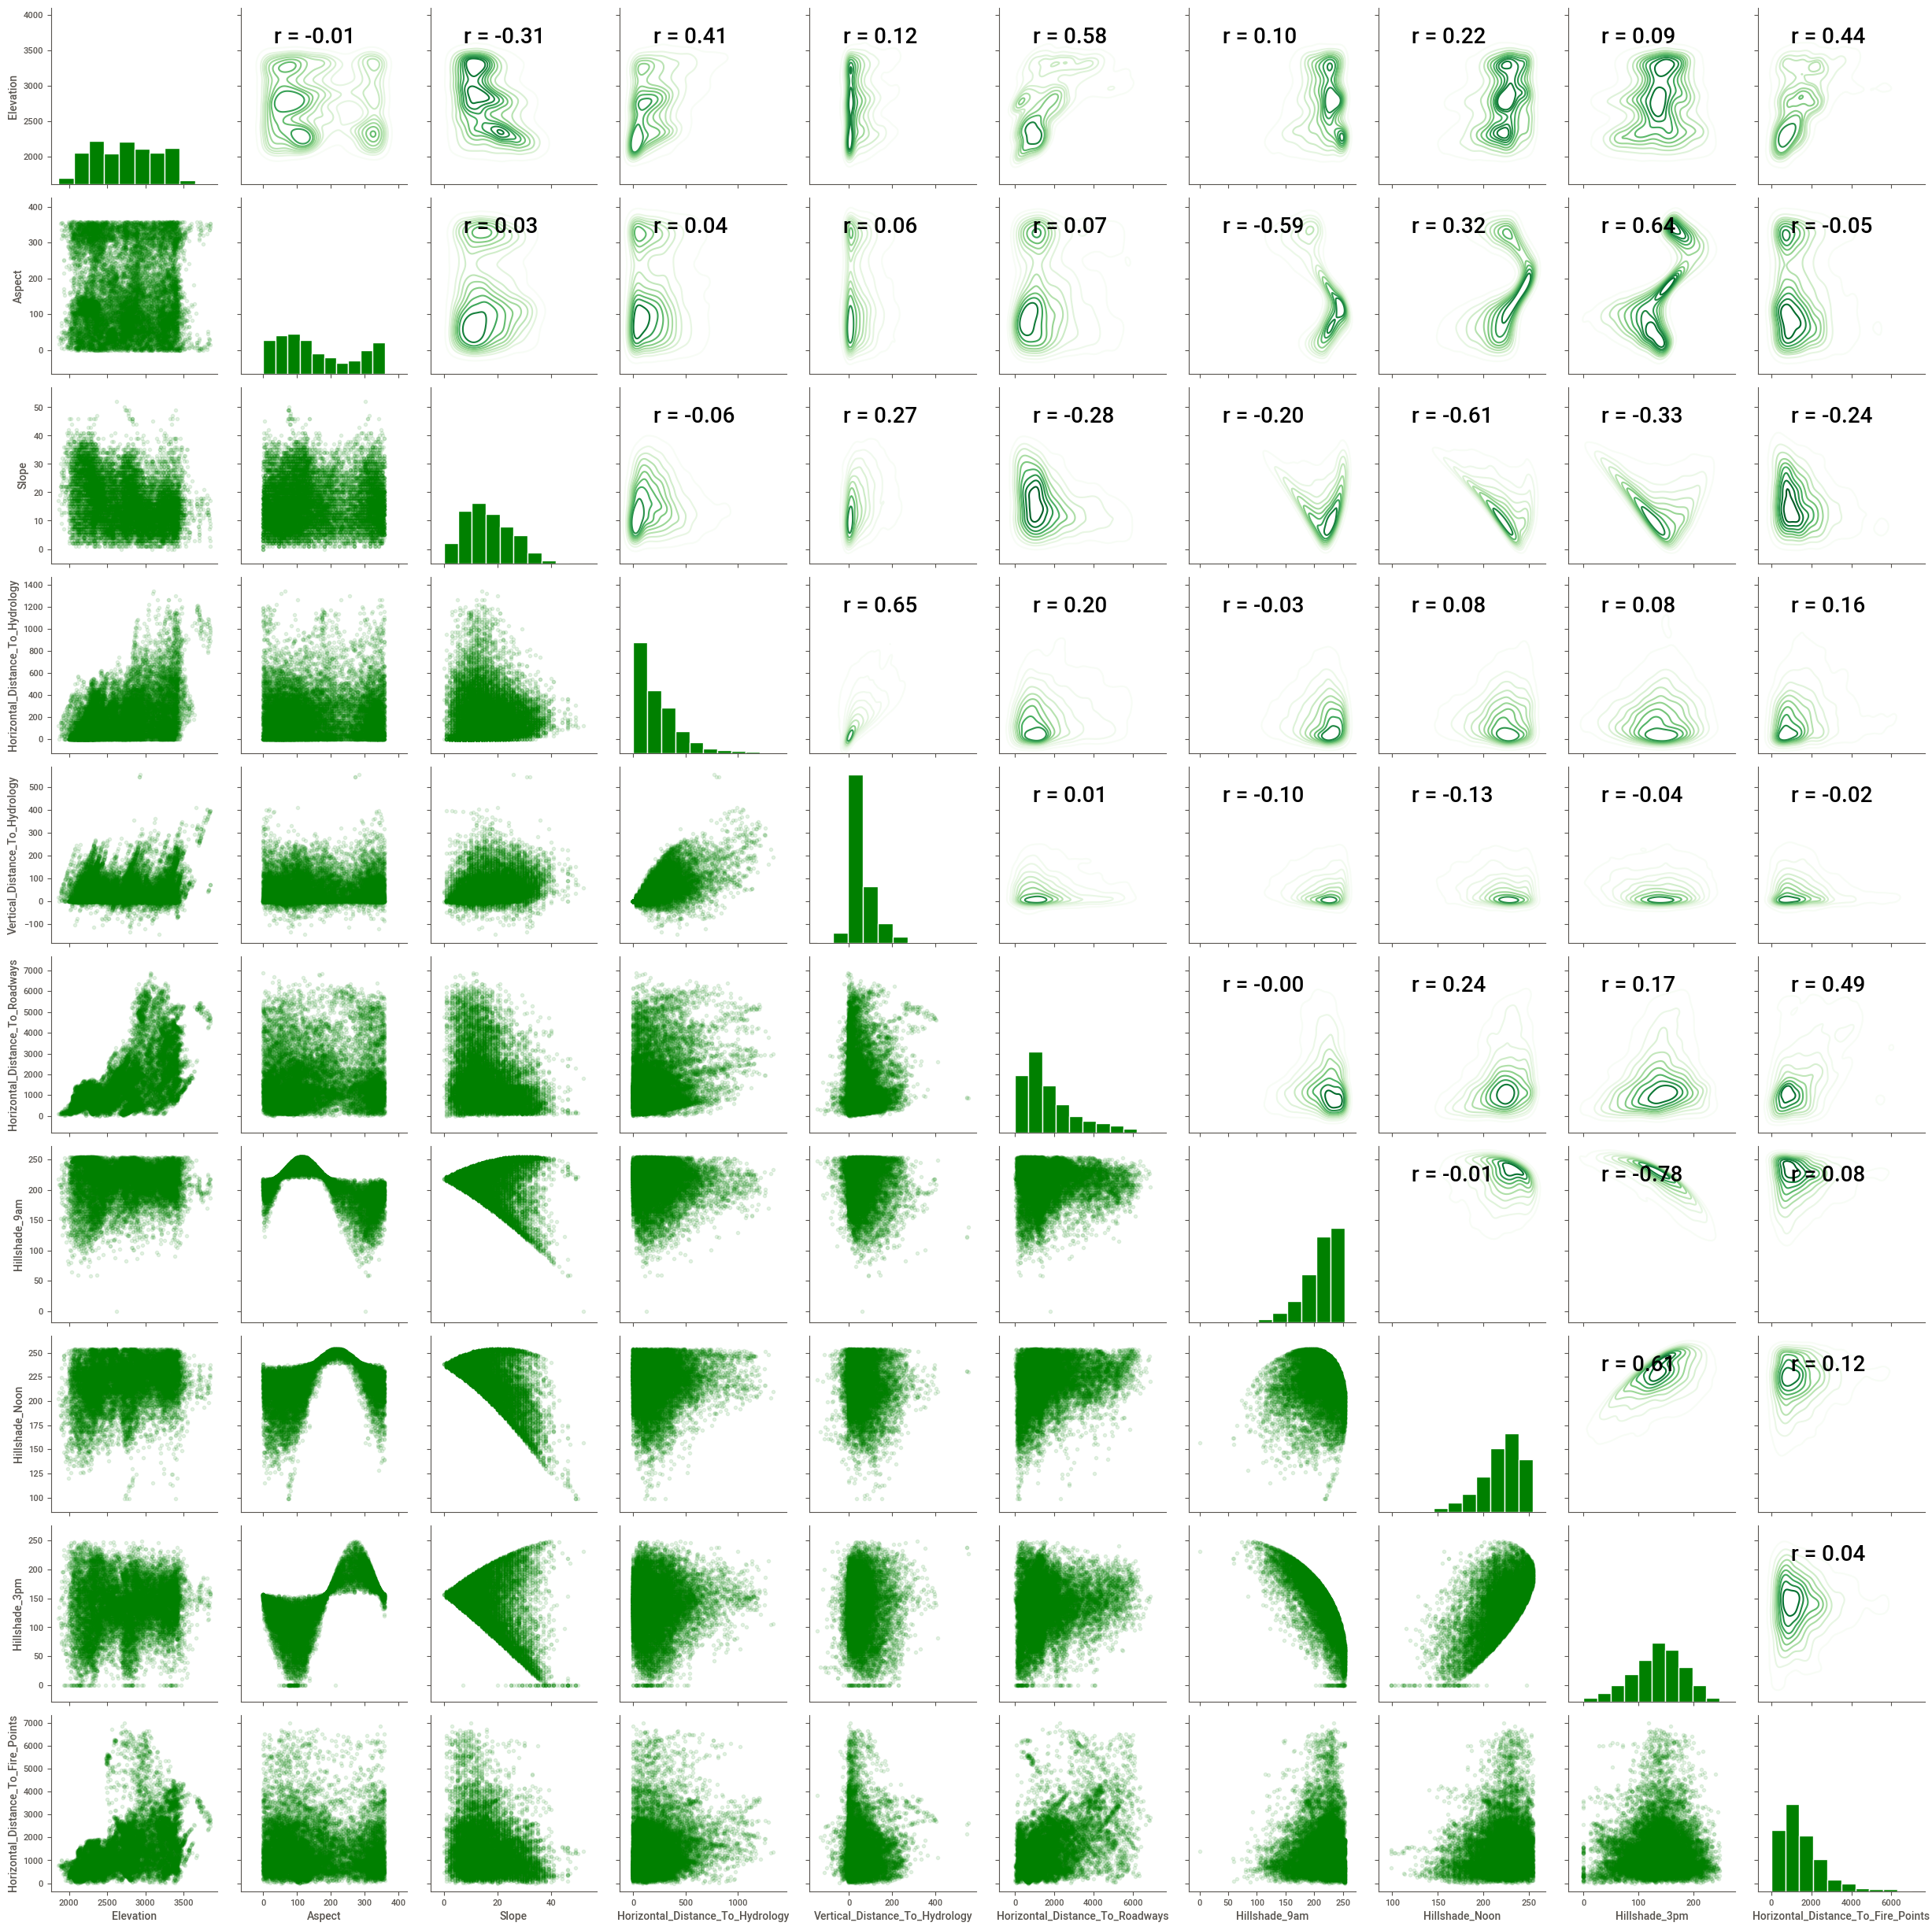

In [17]:
# Create the pairgrid object
grid = sns.PairGrid(data = data[continuous_variables])

# Upper is a correlation and kdeplot
grid.map_upper(corr_func);
grid.map_upper(sns.kdeplot, cmap = plt.cm.Greens)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

# Bottom is scatter plot
grid.map_lower(plt.scatter, color = 'green', alpha = 0.1)

**Distributions:**
* `Hillshade_9am` and `Hillshade_Noon` has bi-modal and left-skewed distributions.
* `Horizontal_Distance_To_Firepoints`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Hydrology` has bi-modal and right-skewed distributions.
* `Elevation` (height of a fantastic trees) resembles a uniform distribution.
* `Slope`, `Vertical_Distance_To_Hydrology`, `Hillshade_3pm` shows a symmetric and bi-modal distribution.

**Some obvious relationships between the continuous features:**
*  `Elevation` and shows positive trend with following variables:
   * `Vertical_Distance_To_Hydrology`
   * `Horizontal_Distance_To_Roadways`
   * `Horizontal_Distance_To_Firepoints`
   * `Horizontal_Distance_To_Hydrology`
* As `Aspect` increases; `Hillshade_Noon` and `Hillshade_3pm` increases.
* `Slope` has negative trend with:
  * `Elevation`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_9am`, `Hillshade_Noon` and `Hillshade_3pm`
  * `Horizontal_Distance_To_Firepoints`
* `Horizontal_Distance_To_Hydrology`  has positive trend with:
  * `Horizontal_Distance_To_Firepoints`
  * `Horizontal_Distance_To_Roadways`
  * `Vertical_Distance_To_Hydrology`
* `Vertical_Distance_To_Hydrology` - `Slope` and `Vertical_Distance_To_Hydrology` - `Horizontal_Distance_To_Hydrology` has obvious collinear relationship.
* As `Horizontal_Distance_To_Roadways` increases, `Horizontal_Distance_To_Firepoints` increases and `Slope` decreases.
* `Hillshade_9am` shows negative trend with `Hillshade_3pm` and `Aspect`, as `Hillshade_9am` increases `Elevation` increases.
* `Hillshade_Noon` has positive trend with:
  * `Elevation`
  * `Aspect`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_3pm` 
  * `Horizontal_Distance_To_Firepoints`
* `Hillshade_3pm` shows perfect negative relationship with `Hillshade_9am` and perfect positive relationship with `Hillshade_Noon`.

**Some Collinear features:**
* hillshade noon - hillshade 3 pm
* hillsahde 3 pm - hillshade 9 am
* vertical distance to hydrology - horizontal distance to hydrology
* elevation - slope

## Insights From Exploratory Data Analysis
<p> Data set have balanced labels, resulting in equal number of cover types. This will be an advantage when it comes to apply classification ML models because, the model will have good chance to learn patterns of all labels, eliminating the probability of underfitting. <p/>
<p> Different wilderness areas consist of some specific trees. Interestingly, there is one fantastic tree, Cottonwood/Willow, specifically likes to grow in wilderness area 4. While cover types 1, 2, 5 and 6 can grow in any soil type, other cover types grows more with specific soil types. <p/>
<p> Soil types are reverse-one-hot-encoded, meaning they are going to be included as numeric data in the training set and one-hot-encoded soil type columns will be excluded. With that way, there is a stronger correlation between soil type and Cover_Type. Numeric soil type column and other variables have pearson coefficients in the range of [-0.2, 0.1]. <p/>
<p> Hillshade columns are collinear within each other and Hillshade_9am has the least importance in determining Cover_Type. Thus this column will be dropped in Part 3 for better interpretability of the future model. <p/>

## Data Preprocessing

In [15]:
data

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type34  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type40  Cover_Type  Wilderness_Area_Type  Soil_Type  
0                0           5      Wilderness_Area1         29  
1                0           5      Wilderness_Area1         29  
2                0           2      Wilderness_Area1         12  
3                0           2      Wilderness_Area1         30  
4                0           5      Wilderness_Area1         29  
...            ...         ...                

In [16]:
data.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [17]:
data = data.drop('Id', axis=1)


In [18]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [19]:
data['Cover_Type'].value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

### Check if Wilderness_Area and Soil_Type columns have only binary values

In [20]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in data.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(data[is_binary_columns].values.ravel())

array([1, 0, 'Wilderness_Area1', 29, 12, 30, 18, 16, 20, 24, 23, 40, 19,
       8, 22, 39, 9, 38, 'Wilderness_Area3', 33, 31, 32, 11, 10,
       'Wilderness_Area4', 5, 28, 4, 2, 13, 17, 3, 34, 6, 14, 37, 35, 36,
       21, 26, 'Wilderness_Area2', 27, 25], dtype=object)

In [21]:
# sum of all widerness area columns
data["w_sum"] = data["Wilderness_Area1"] + data["Wilderness_Area2"] + data["Wilderness_Area3"] + data["Wilderness_Area4"]
print(data.w_sum.value_counts())

w_sum
1    15120
Name: count, dtype: int64


In [22]:
# create a list of soil_type columns
soil_columns = [c for c in data.columns if "Soil" in c]
data["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    data["soil_sum"] += data[c]

print(data.soil_sum.value_counts())

soil_sum
11    2142
30    1291
3      978
4      962
5      843
24     757
39     728
31     725
33     690
40     657
7      650
34     616
18     612
14     476
41     459
12     406
23     345
32     332
25     257
13     227
15     169
6      165
21     139
17     114
36     102
19      60
27      54
20      46
38      34
35      22
22      16
28      15
10      10
37      10
29       9
9        1
26       1
Name: count, dtype: int64


In [23]:
data.drop(columns=["w_sum", "soil_sum"], inplace=True)

`Wilderness_Area` and `Soil_Type1-40` having only binary values and only one `soil_type` or `wilderness_area` being equal to 1, shows that they are one-hot-encoded columns.

One important thing about forest types are, they can only belong to one soil type or one wilderness area.

# Outliers Handling

In [24]:
data

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type34  Soil_Type35  \
0                                    6279  ...            0            0   
1                                    6225  ...            0            0   
2                                    6121  ...            0            0   
3                                    6211  ...            0            0   
4                                    6172  ...            0            0   
...                                   ...  ...          ...          ...   
15115                                1282  ...            0            0   
15116                                1325  ...            0            0   
15117                                1187  ...            0            0   
15118                                 932  ...            0            0   
15119                                 914  ...            0            0   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0     

In [25]:
data.Soil_Type39.unique()

array([0, 1], dtype=int64)

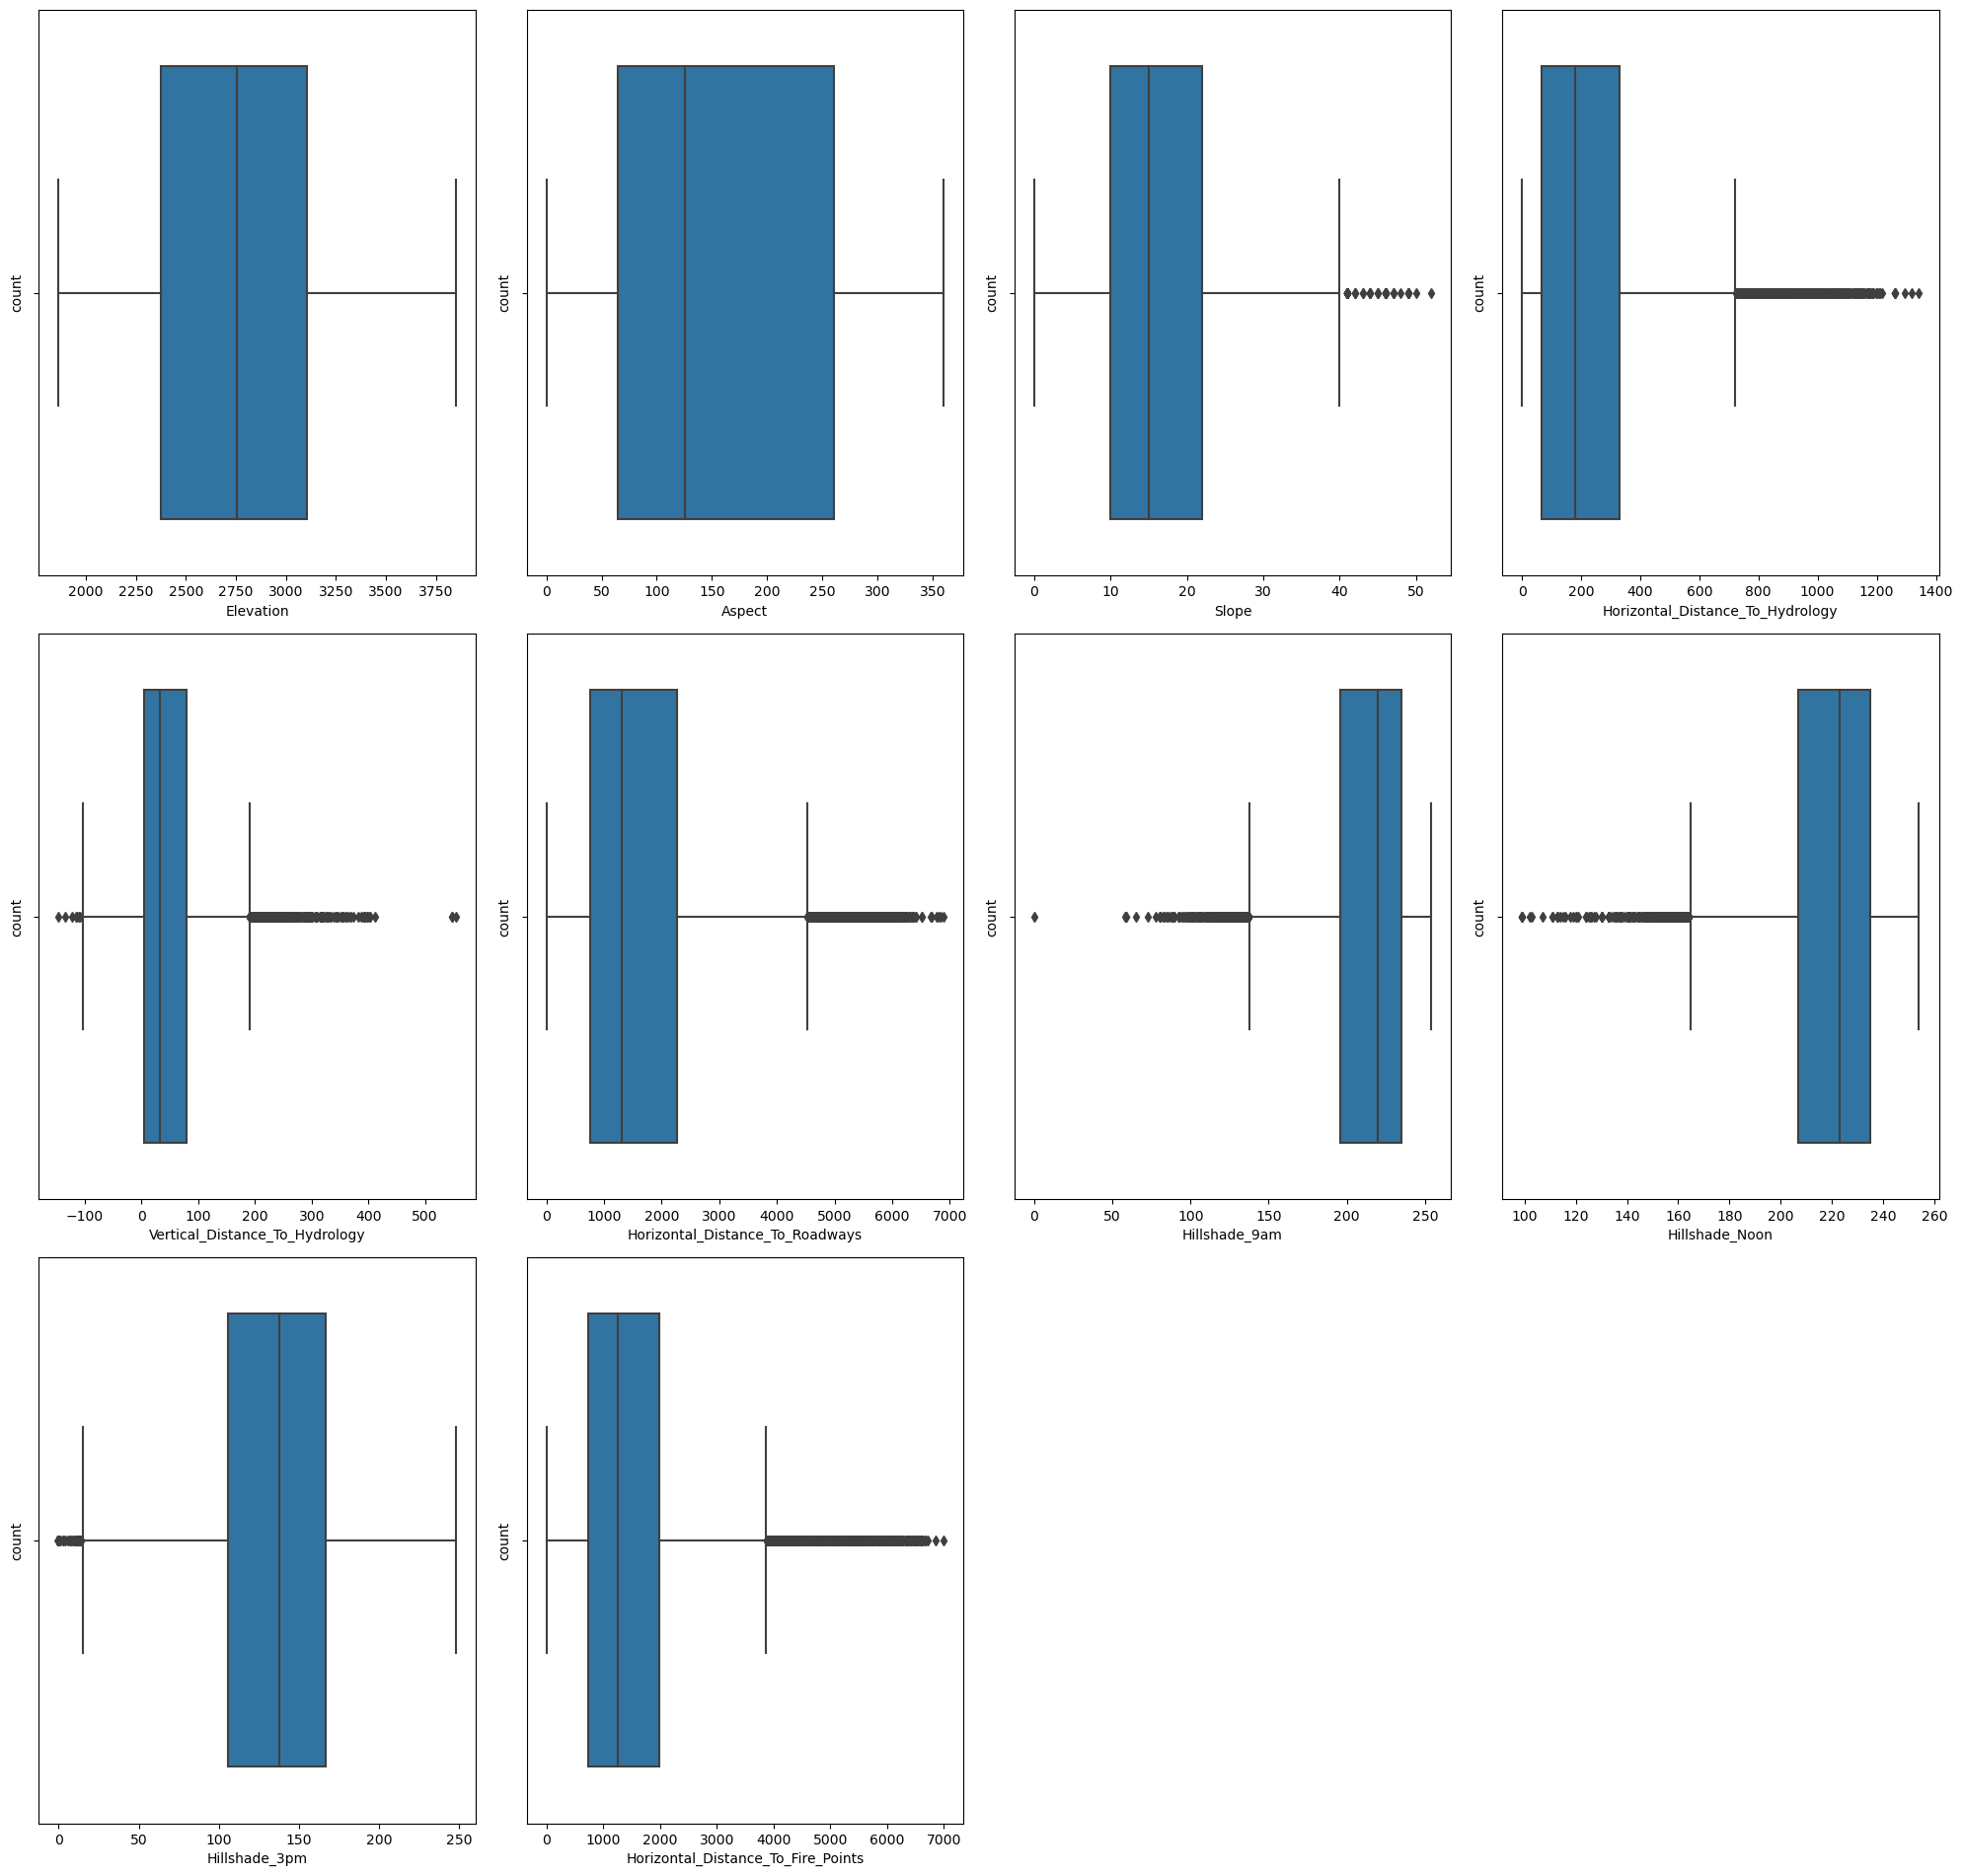

In [26]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 10:
        ax = plt.subplot(4, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

In [27]:
import numpy as np
from scipy import stats

col = 1
for c in data:  # Assuming data is your DataFrame
    if col <= 10:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Double-check if outliers are replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

Elevation IQR: 728.0
Elevation min_limit: 1284.0
Elevation max_limit: 4196.0 

Replaced outliers in Elevation: Series([], Name: Elevation, dtype: int64) 

Aspect IQR: 196.0
Aspect min_limit: -229.0
Aspect max_limit: 555.0 

Replaced outliers in Aspect: Series([], Name: Aspect, dtype: int64) 

Slope IQR: 12.0
Slope min_limit: -8.0
Slope max_limit: 40.0 

Replaced outliers in Slope: Series([], Name: Slope, dtype: int64) 

Horizontal_Distance_To_Hydrology IQR: 263.0
Horizontal_Distance_To_Hydrology min_limit: -327.5
Horizontal_Distance_To_Hydrology max_limit: 724.5 

Replaced outliers in Horizontal_Distance_To_Hydrology: Series([], Name: Horizontal_Distance_To_Hydrology, dtype: int64) 

Vertical_Distance_To_Hydrology IQR: 74.0
Vertical_Distance_To_Hydrology min_limit: -106.0
Vertical_Distance_To_Hydrology max_limit: 190.0 

Replaced outliers in Vertical_Distance_To_Hydrology: Series([], Name: Vertical_Distance_To_Hydrology, dtype: int64) 

Horizontal_Distance_To_Roadways IQR: 1506.0
Horiz

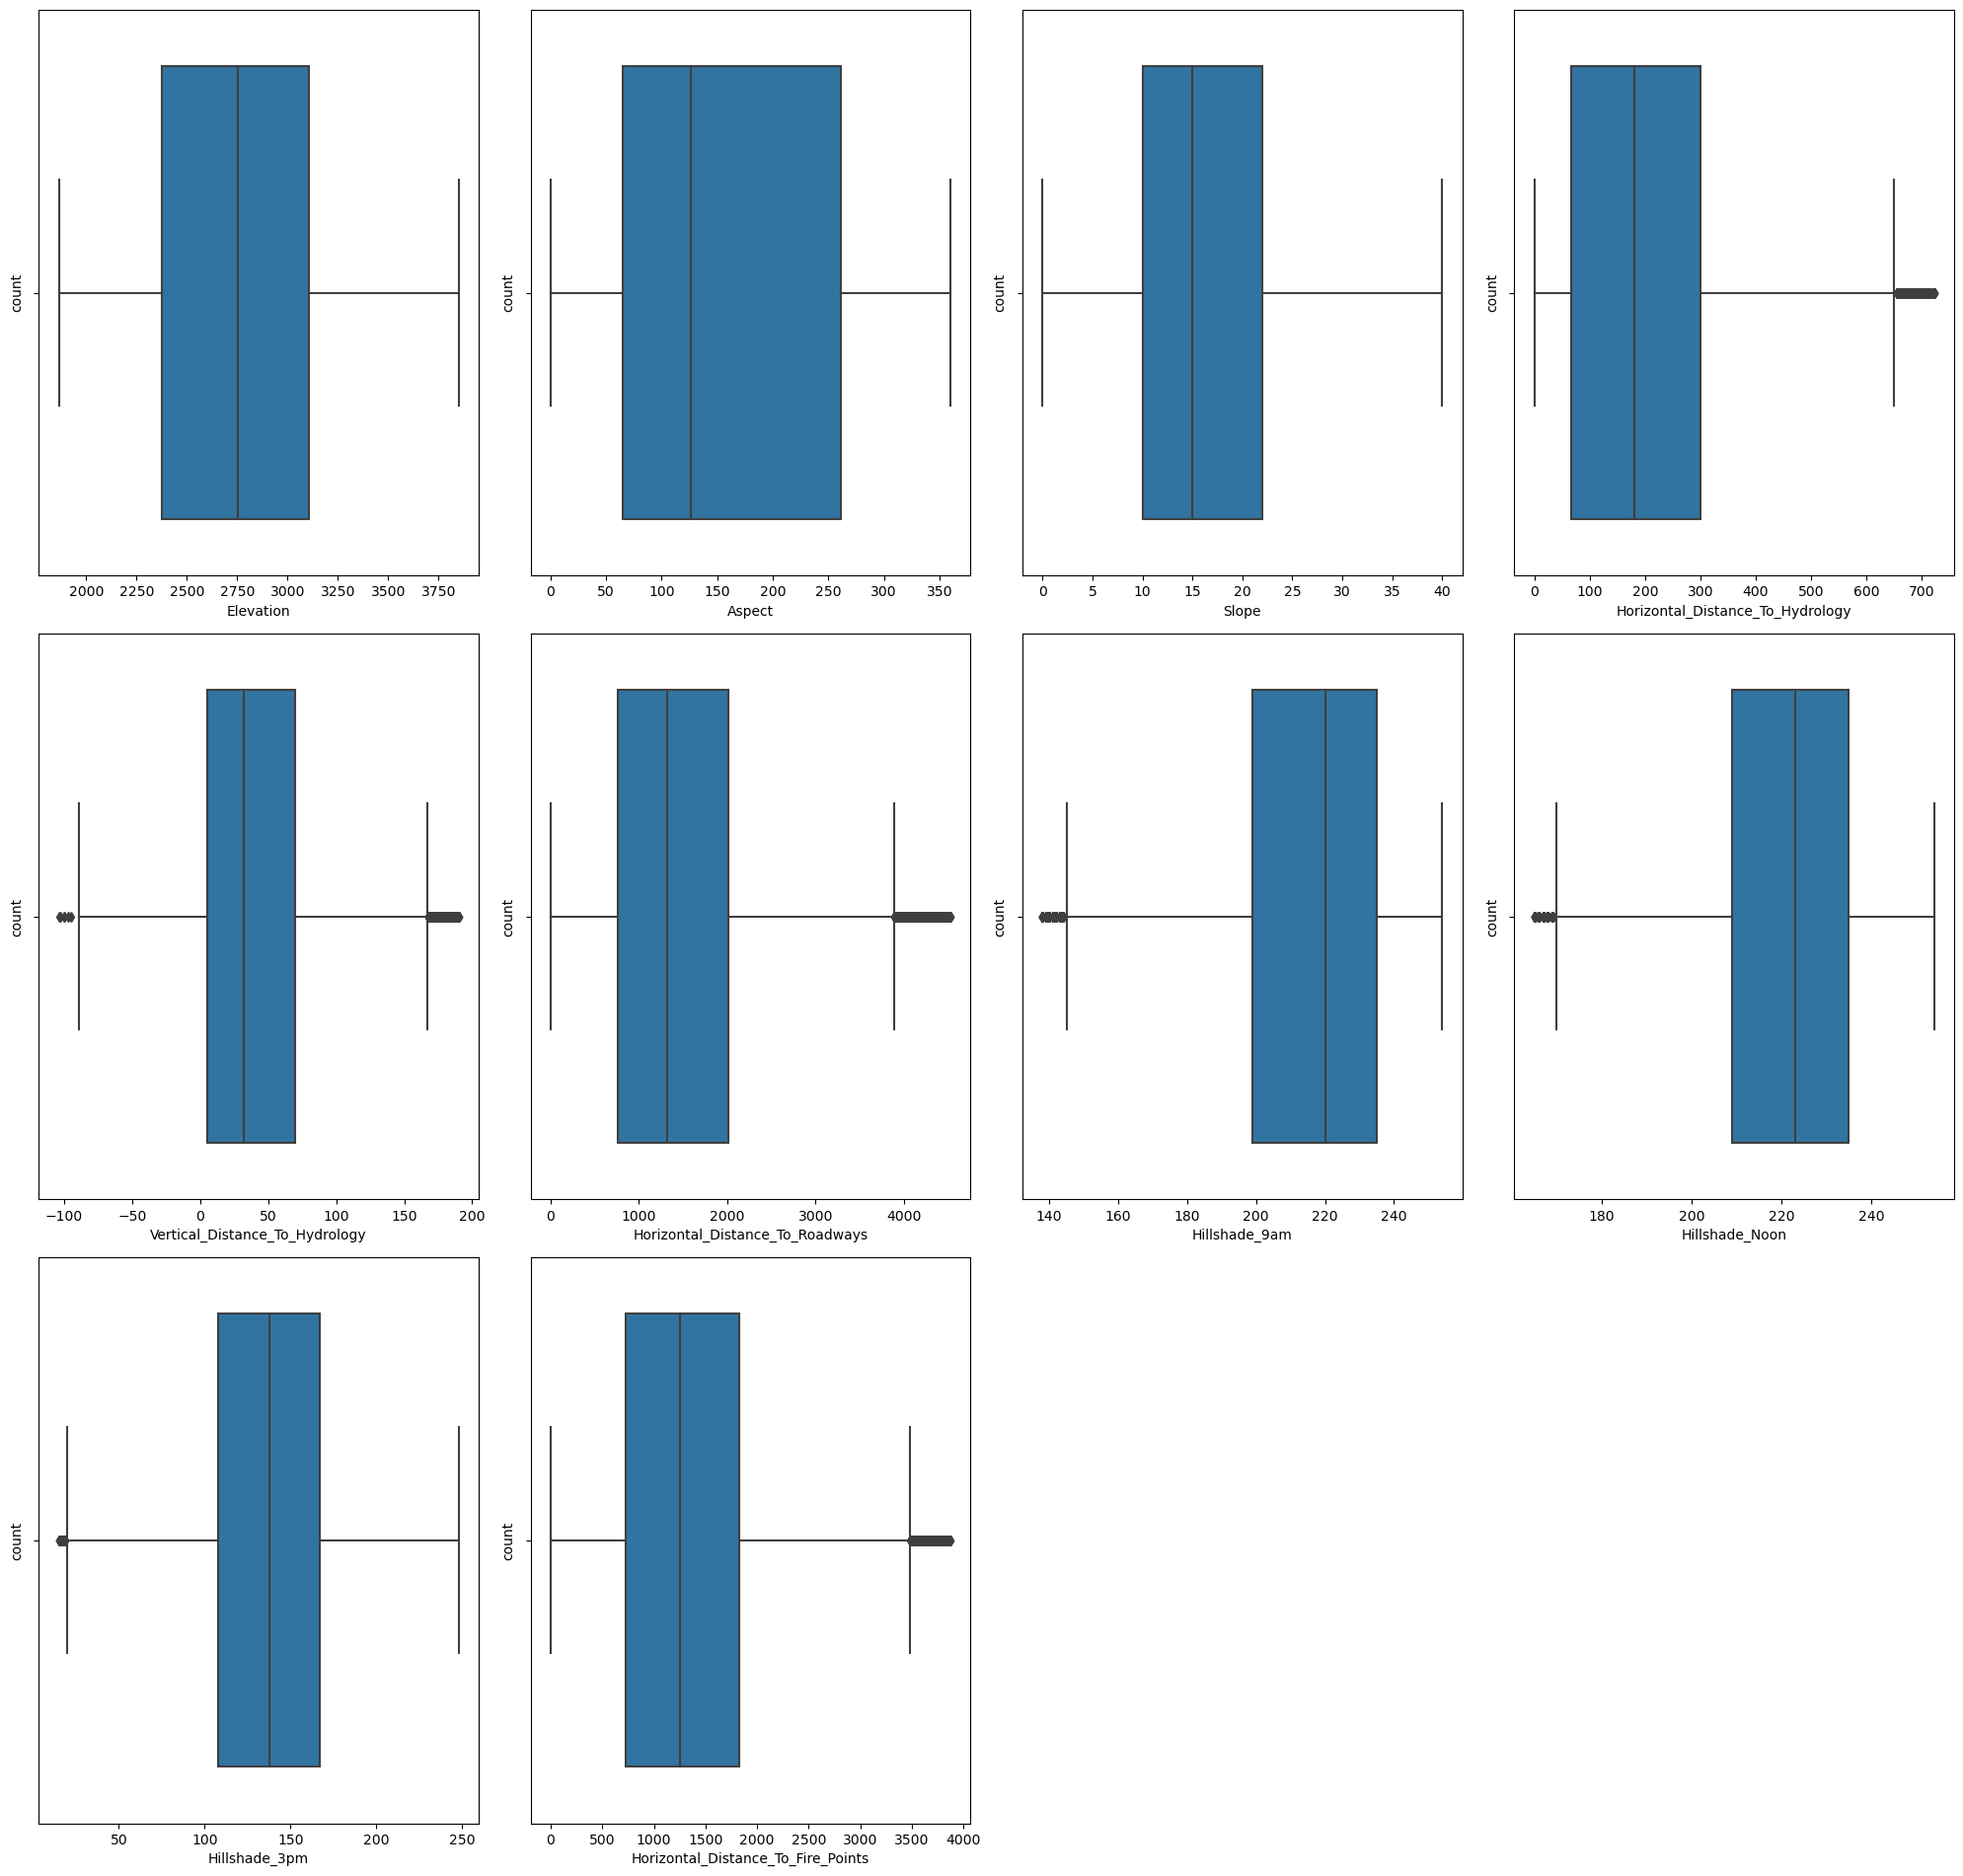

In [28]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 10:
        ax = plt.subplot(4, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

#  Feature Engineering & Selection


In the data set, the strongest positive pearson coefficient is 0.22 and -0.11 on the other end. After doing some Google Search about the features, maybe adding some features might help achieving stronger correlations. 


* Elevation and Vertical Distance to Hydrology
* Horizontal Distance to Hydrology and Horizontal Distance to Firepoints
* Horizontal Distance to Hydrology and Horizontal Distance to Roadways 
* Horizontal Distance to Firepoints and Horizontal Distance to Roadways
* Euclidian Distance of Horizontal Distance to Hydrology and Vertical Distance to Hydrology

After the addition, I will perform square root transformation to the features with positive data range. Square root transformation might help especially for the highly skewed distributions.

After the addition and transformation, I will check pearson coefficients again.

In [29]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
data_w_numeric_soil = data[all_features_w_label]

# add columns
data_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (data_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           data_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
data_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (data_w_numeric_soil['Elevation'] + 
                                                                      data_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
data_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (data_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              data_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
data_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (data_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            data_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
data_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (data_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             data_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

In [30]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in data_w_numeric_soil.columns:
    if data_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            data_w_numeric_soil['sqrt' + col] = np.sqrt(data_w_numeric_soil[col])

In [31]:
correlations_transformed = pd.DataFrame(data_w_numeric_soil.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

Feature  \
30                            sqrtWilderness_Area1   
10                                Wilderness_Area1   
7                                   Hillshade_Noon   
27                              sqrtHillshade_Noon   
3                 Horizontal_Distance_To_Hydrology   
24            sqrtHorizontal_Distance_To_Hydrology   
16                 Euclidian_Distance_To_Hydrology   
35             sqrtEuclidian_Distance_To_Hydrology   
28                               sqrtHillshade_3pm   
8                                    Hillshade_3pm   
37          sqrtMean_Distance_Hydrology_Firepoints   
18              Mean_Distance_Hydrology_Firepoints   
26                               sqrtHillshade_9am   
6                                    Hillshade_9am   
38            sqrtMean_Distance_Hydrology_Roadways   
39           sqrtMean_Distance_Firepoints_Roadways   
19                Mean_Distance_Hydrology_Roadways   
29          sqrtHorizontal_Distance_To_Fire_Points   
9               Horizontal_Distance_To_Fire_Points   
20               Mean_Distance_Firepoints_Roadways   
25             sqrtHorizontal_Distance_To_Roadways   
5                  Horizontal_Distance_To_Roadways   
22                                      sqrtAspect   
21                                   sqrtElevation   
1                                           Aspect   
36  sqrtMean_Elevation_Vertical_Distance_Hydrology   
11                                Wilderness_Area2   
31                            sqrtWilderness_Area2   
0                                        Elevation   
17      Mean_Elevation_Vertical_Distance_Hydrology   
34                                   sqrtSoil_Type   
4                   Vertical_Distance_To_Hydrology   
33                            sqrtWilderness_Area4   
13                                Wilderness_Area4   
14                                       Soil_Type   
2                                            Slope   
23                                       sqrtSlope   
32                            sqrtWilderness_Area3   
12                                Wilderness_Area3   

    Correlation with Cover_Type  
30                    -0.230117  
10                    -0.230117  
7                     -0.089779  
27                    -0.089616  
3                     -0.078113  
24                    -0.072964  
16                    -0.071974  
35                    -0.067700  
28                    -0.053596  
8                     -0.049237  
37                    -0.032850  
18                    -0.028610  
26                    -0.027070  
6                     -0.024727  
38                    -0.024238  
39                    -0.023081  
19                    -0.019430  
29                    -0.017763  
9                     -0.014129  
20                    -0.012402  
25                    -0.011703  
5                     -0.007292  
22                     0.002496  
21                     0.006661  
1                      0.008015  
36                     0.011167  
11                     0.014994  
31                     0.014994  
0                      0.016090  
17                     0.020911  
34                     0.039067  
4                      0.043895  
33                     0.075774  
13                     0.075774  
14                     0.076585  
2                      0.087287  
23                     0.092530  
32                     0.122146  
12                     0.122146

So, in addition to the existing features, final features will be:
* Instead of Horizontal_Distance_To_Hydrology, sqrtHorizontal_Distance_To_Hydrology
* sqrtMean_Distance_Hydrology_Roadways
* sqrtEuclidian_Distance_To_Hydrology
* Mean_Elevation_Vertical_Distance_Hydrology
* Mean_Distance_Firepoints_Roadways
* Mean_Distance_Hydrology_Firepoints

Additionally, I will drop Hillshade_9am column since it is strongly correlated with Hillshadde_3pm.

In [32]:
# final list of features
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features)

In [33]:
data

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                              32                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type34  Soil_Type35  \
0                                    1256  ...            0            0   
1                                    1256  ...            0            0   
2                                    1256  ...            0            0   
3                                    1256  ...            0            0   
4                                    1256  ...            0            0   
...                                   ...  ...          ...          ...   
15115                                1282  ...            0            0   
15116                                1325  ...            0            0   
15117                                1187  ...            0            0   
15118                                 932  ...            0            0   
15119                                 914  ...            0            0   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0     

In [34]:
X = data_w_numeric_soil[all_features]
y = data_w_numeric_soil["Cover_Type"]

## Data Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is your target variable with categorical labels
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable 'y'
y_encoded = label_encoder.fit_transform(y)

# Now 'y_encoded' contains the encoded integer labels starting from 0
# You can use 'y_encoded' for model training


In [36]:
X

Elevation  Aspect  Slope  Vertical_Distance_To_Hydrology  \
0           2596      51      3                               0   
1           2590      56      2                              -6   
2           2804     139      9                              65   
3           2785     155     18                             118   
4           2595      45      2                              -1   
...          ...     ...    ...                             ...   
15115       2607     243     23                               7   
15116       2603     121     19                              32   
15117       2492     134     25                             117   
15118       2487     167     28                             101   
15119       2475     197     34                              78   

       Horizontal_Distance_To_Roadways  Hillshade_Noon  Hillshade_3pm  \
0                                  510             232            148   
1                                  390             235            151   
2                                 3180             238            135   
3                                 3090             238            122   
4                                  391             234            150   
...                                ...             ...            ...   
15115                              660             251            214   
15116                              618             221             91   
15117                              335             220             83   
15118                              242             237            119   
15119                              270             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                    1256                 1                 0   
1                                    1256                 1                 0   
2                                    1256                 1                 0   
3                                    1256                 1                 0   
4                                    1256                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type  \
0                     0                 0         29   
1                     0                 0         29   
2                     0                 0         12   
3                     0                 0         30   
4                     0                 0         29   
...                 ...               ...        ...   
15115                 1                 0          4   
15116                 1                 0          4   
15117                 1                 0          4   
15118                 1                 0          4   
15119                 1                 0          2   

       sqrtHorizontal_Distance_To_Hydrology  \
0                                 16.062378   
1                                 14.560220   
2                                 16.370706   
3                                 15.556349   
4                                 12.369317   
...                                     ...   
15115                             16.062378   
15116                             25.159491   
15117                             19.104973   
15118                             14.764823   
15119                             17.860571   

       sqrtMean_Distance_Hydrology_Roadways  \
0                                 19.595918   
1                   

In [37]:
y

0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [38]:
y_encoded

array([4, 4, 1, ..., 2, 2, 2], dtype=int64)

In [39]:
X.shape

(15120, 19)

In [40]:
y_encoded.shape

(15120,)

In [59]:
y.value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

## Task 2:-Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..

In [41]:

from sklearn.model_selection import train_test_split

In [42]:

X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size = 0.30, random_state=42)

In [43]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform testing set
X_test_scaled = scaler.transform(X_test)

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test_scaled)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

print("Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))


Decision Tree Accuracy: 0.7857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       620
           1       0.62      0.59      0.60       658
           2       0.74      0.74      0.74       645
           3       0.93      0.93      0.93       661
           4       0.83      0.87      0.85       650
           5       0.78      0.77      0.77       650
           6       0.92      0.94      0.93       652

    accuracy                           0.79      4536
   macro avg       0.78      0.78      0.78      4536
weighted avg       0.78      0.79      0.78      4536

Confusion Matrix:
[[407 148   1   0  20   0  44]
 [166 385  24   0  67   6  10]
 [  0  17 476  24  15 113   0]
 [  0   0  32 613   0  16   0]
 [ 12  45  17   0 568   8   0]
 [  2  16  94  24  13 501   0]
 [ 31   7   0   0   0   0 614]]


### Hyperparameter Tunning

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV with the defined parameter grid and cross-validation folds
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search cross-validation to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)

# Train the model with the best hyperparameters
best_dt_classifier.fit(X_train, y_train)

# Make predictions
dt_predictions = best_dt_classifier.predict(X_test)

# Evaluate the model after hyperparameter tuning
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy after Hyperparameter Tuning:", dt_accuracy)

print("Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy after Hyperparameter Tuning: 0.7918871252204586
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       620
           1       0.60      0.59      0.59       658
           2       0.81      0.77      0.79       645
           3       0.92      0.94      0.93       661
           4       0.83      0.87      0.85       650
           5       0.79      0.79      0.79       650
           6       0.92      0.93      0.93       652

    accuracy                           0.79      4536
   macro avg       0.79      0.79      0.79      4536
weighted avg       0.79      0.79      0.79      4536

Confusion Matrix:
[[401 162   0   0  14   2  41]
 [165 385  14   0  76  10   8]
 [  0   8 497  29   8 103   0]
 [  0   0  24 622   0  

##  Support Vector Machines (SVM)

In [46]:
from sklearn.svm import SVC

# Initialize and train the model
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test_scaled)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

print("Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


SVM Accuracy: 0.7625661375661376
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       620
           1       0.70      0.55      0.62       658
           2       0.67      0.68      0.67       645
           3       0.85      0.94      0.89       661
           4       0.79      0.88      0.83       650
           5       0.72      0.67      0.69       650
           6       0.90      0.94      0.92       652

    accuracy                           0.76      4536
   macro avg       0.76      0.76      0.76      4536
weighted avg       0.76      0.76      0.76      4536

Confusion Matrix:
[[422 101   1   0  30   2  64]
 [149 362  21   0  99  20   7]
 [  0   0 440  61  15 129   0]
 [  0   0  27 621   0  13   0]
 [  4  39  30   0 571   6   0]
 [  0  14 139  52  12 433   0]
 [ 40   0   2   0   0   0 610]]


### Hyperparameter Tunning

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize Support Vector Machine classifier
svm_classifier = SVC()

# Initialize GridSearchCV with the defined parameter grid and cross-validation folds
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search cross-validation to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Support Vector Machine classifier with the best hyperparameters
best_svm_classifier = SVC(**best_params)

# Train the model with the best hyperparameters
best_svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = best_svm_classifier.predict(X_test_scaled)

# Evaluate the model after hyperparameter tuning
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy after Hyperparameter Tuning:", svm_accuracy)

print("Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy after Hyperparameter Tuning: 0.8115079365079365
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       620
           1       0.72      0.63      0.67       658
           2       0.76      0.73      0.75       645
           3       0.89      0.97      0.93       661
           4       0.83      0.91      0.87       650
           5       0.79      0.78      0.79       650
           6       0.92      0.95      0.93       652

    accuracy                           0.81      4536
   macro avg       0.81      0.81      0.81      4536
weighted avg       0.81      0.81      0.81      4536

Confusion Matrix:
[[437 114   1   0  21   0  47]
 [128 414  21   0  75  15   5]
 [  0   5 472  47  14 107   0]
 [  0   0  18 638   0   5   0]
 [  3  31  17   0 594   5   0]
 [  0   9  92  30 

## k-Nearest Neighbors (k-NN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-NN Accuracy:", knn_accuracy)

print("Classification Report:")
print(classification_report(y_test, knn_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))


k-NN Accuracy: 0.7804232804232805
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       620
           1       0.70      0.53      0.60       658
           2       0.74      0.68      0.71       645
           3       0.87      0.96      0.91       661
           4       0.79      0.91      0.84       650
           5       0.75      0.79      0.77       650
           6       0.89      0.95      0.92       652

    accuracy                           0.78      4536
   macro avg       0.77      0.78      0.77      4536
weighted avg       0.77      0.78      0.77      4536

Confusion Matrix:
[[397 118   4   0  34   3  64]
 [154 346  29   0  93  20  16]
 [  1   2 437  61  16 128   0]
 [  0   0  14 633   0  14   0]
 [  6  19  23   0 593   9   0]
 [  0   6  83  32  17 512   0]
 [ 23   6   0   0   1   0 622]]


### Hyperparameter Tunning

In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric used for the tree
}

# Initialize K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV with the defined parameter grid and cross-validation folds
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search cross-validation to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize K-Nearest Neighbors classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Train the model with the best hyperparameters
best_knn_classifier.fit(X_train, y_train)

# Make predictions
knn_predictions = best_knn_classifier.predict(X_test)

# Evaluate the model after hyperparameter tuning
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-NN Accuracy after Hyperparameter Tuning:", knn_accuracy)

print("Classification Report:")
print(classification_report(y_test, knn_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
k-NN Accuracy after Hyperparameter Tuning: 0.8110670194003528
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       620
           1       0.71      0.53      0.61       658
           2       0.82      0.73      0.77       645
           3       0.87      0.97      0.92       661
           4       0.80      0.96      0.87       650
           5       0.81      0.85      0.83       650
           6       0.88      0.97      0.92       652

    accuracy                           0.81      4536
   macro avg       0.80      0.81      0.80      4536
weighted avg       0.80      0.81      0.80      4536

Confusion Matrix:
[[408 112   1   0  30   0  69]
 [122 350  28   3 113  23  19]
 [  0  14 468  58  10  95   0]
 [  0   0   7 643   0  11   0]
 [  3   8  11   0 627   1   

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

print("Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Accuracy: 0.8681657848324515
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       620
           1       0.81      0.67      0.73       658
           2       0.85      0.85      0.85       645
           3       0.94      0.98      0.96       661
           4       0.88      0.95      0.91       650
           5       0.86      0.88      0.87       650
           6       0.95      0.97      0.96       652

    accuracy                           0.87      4536
   macro avg       0.87      0.87      0.87      4536
weighted avg       0.87      0.87      0.87      4536

Confusion Matrix:
[[478  91   1   0  20   0  30]
 [120 441  19   0  59  15   4]
 [  0   1 549  20   5  70   0]
 [  0   0  13 645   0   3   0]
 [  3  11  14   0 620   2   0]
 [  0   2  51  20   4 573   0]
 [ 19   1   0   0   0   0 632]]


## Hyperparameter Tunning

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV with the defined parameter grid and cross-validation folds
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search cross-validation to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Train the model with the best hyperparameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = best_rf_classifier.predict(X_test)

# Evaluate the model after hyperparameter tuning
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy after Hyperparameter Tuning:", rf_accuracy)

print("Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy after Hyperparameter Tuning: 0.8648589065255732
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       620
           1       0.79      0.66      0.72       658
           2       0.85      0.84      0.85       645
           3       0.93      0.98      0.95       661
           4       0.88      0.95      0.91       650
           5       0.87      0.88      0.87       650
           6       0.94      0.97      0.96       652

    accuracy                           0.86      4536
   macro avg       0.86      0.86      0.86      4536
weighted avg       0.86      0.86      0.86      4536

Confusion Matrix:
[[469  98   1   0  19   0  33]
 [121 436  22   0  59  14   6]
 [  0   1 545  27   4  68   0]
 [  0   0  11 648   0   2

## Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions
gb_predictions = gb_classifier.predict(X_test_scaled)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

print("Classification Report:")
print(classification_report(y_test, gb_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))


Gradient Boosting Accuracy: 0.8018077601410935
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       620
           1       0.72      0.57      0.63       658
           2       0.76      0.75      0.75       645
           3       0.90      0.97      0.93       661
           4       0.79      0.89      0.84       650
           5       0.78      0.76      0.77       650
           6       0.92      0.95      0.94       652

    accuracy                           0.80      4536
   macro avg       0.80      0.80      0.80      4536
weighted avg       0.80      0.80      0.80      4536

Confusion Matrix:
[[448  95   1   0  32   1  43]
 [148 374  20   0  91  17   8]
 [  0   0 486  41  12 106   0]
 [  0   0  14 638   0   9   0]
 [  3  41  19   0 579   8   0]
 [  0   9 101  28  20 492   0]
 [ 29   1   2   0   0   0 620]]


## XG Boosting

In [53]:
import xgboost as xgb

# Initialize and train the model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


XGBoost Accuracy: 0.8518518518518519
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       620
           1       0.74      0.64      0.69       658
           2       0.84      0.83      0.84       645
           3       0.94      0.98      0.96       661
           4       0.86      0.94      0.90       650
           5       0.86      0.86      0.86       650
           6       0.95      0.97      0.96       652

    accuracy                           0.85      4536
   macro avg       0.85      0.85      0.85      4536
weighted avg       0.85      0.85      0.85      4536

Confusion Matrix:
[[457 117   1   0  15   1  29]
 [134 423  22   0  65  10   4]
 [  0   2 536  25   8  74   0]
 [  0   0  11 645   0   5   0]
 [  3  18  13   0 611   5   0]
 [  2   7  55  18   7 561   0]
 [ 18   2   0   0   1   0 631]]


## Hyperparameter Tunning

In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV with the defined parameter grid and cross-validation folds
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search cross-validation to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params)

# Train the model with the best hyperparameters
best_xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_predictions = best_xgb_classifier.predict(X_test)

# Evaluate the model after hyperparameter tuning
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy after Hyperparameter Tuning:", xgb_accuracy)

print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
XGBoost Accuracy after Hyperparameter Tuning: 0.8606701940035273
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       620
           1       0.77      0.65      0.70       658
           2       0.84      0.84      0.84       645
           3       0.94      0.98      0.96       661
           4       0.87      0.95      0.91       650
           5       0.86      0.87      0.86       650
           6       0.95      0.97      0.96       652

    accuracy                           0.86      4536
   macro avg       0.86      0.86      0.86      4536
weighted avg       0.86      0.86      0.86      4536

Confusion Matrix:
[[474 103   1   0  16   1  25]
 [130 428  21   0  61  13   5]
 [  0   4 543  24   6  68   0]
 [  0   0  10 647   0   4   0]
 [  3  17  12   0 615   3   0]

## TASK3:- Model Comparison Report

Text(0.5, 1.0, 'Accuracy Score of Different Models')

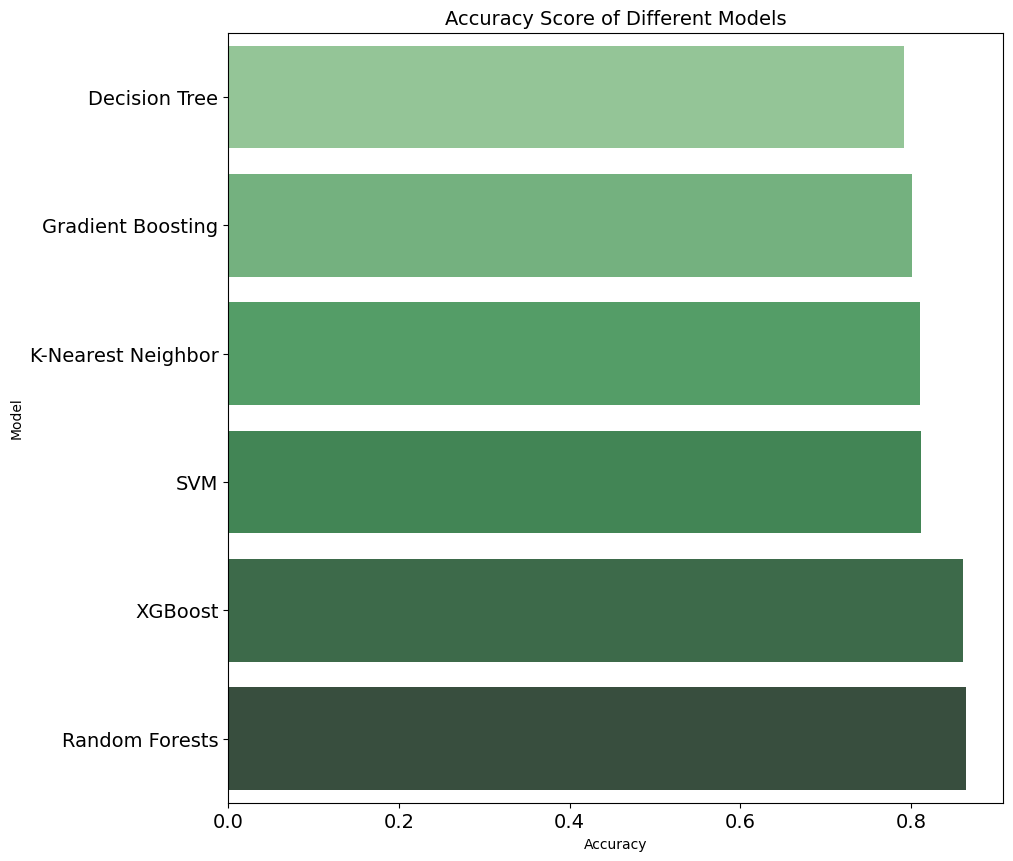

In [56]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Decision Tree", "Random Forests", "SVM", "Gradient Boosting", "XGBoost"],
                                       "Accuracy": [knn_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, gb_accuracy, xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

**Based on the comparison of models trained on the forest cover prediction dataset, we can draw several insights and conclusions:**

**Model Performance:**

The Random Forest and XGBoost models achieved the highest accuracy among all the models considered.
Decision Tree and k-NN models achieved moderate accuracy, while the SVM model lagged slightly behind.
The relative performance of models may vary depending on the specific dataset and problem at hand.
Complexity and Interpretability:

Decision Tree and k-NN models tend to be simpler and more interpretable compared to ensemble methods like Random Forest and XGBoost, which are more complex and often referred to as "black-box" models.
SVM falls somewhere in between, offering good accuracy with a moderate level of interpretability.

**Scalability:**

k-NN and Decision Tree models are relatively straightforward and may scale well with larger datasets.
SVM and ensemble methods like Random Forest and XGBoost can be computationally intensive and may require more resources for training and inference.

**Robustness:**

Ensemble methods like Random Forest and XGBoost are generally more robust to noise and overfitting compared to simpler models like Decision Tree and k-NN.
SVM can also be robust, especially with proper tuning of hyperparameters, but may require careful preprocessing and feature scaling.

**Hyperparameter Sensitivity:**

Ensemble methods like Random Forest and XGBoost have several hyperparameters to tune, but they tend to be less sensitive to the choice of hyperparameters compared to models like SVM.
SVM's performance can be highly dependent on the choice of hyperparameters such as the choice of kernel, regularization parameter (C), and kernel coefficient (gamma).

**Overall Recommendation:**

Based on the comparison, if we prioritize accuracy and robustness and are less concerned about interpretability, ensemble methods like Random Forest and XGBoost are preferable.
If interpretability is a significant concern or computational resources are limited, simpler models like Decision Tree or k-NN can still provide reasonable performance.
The choice of model ultimately depends on the specific requirements of the problem, computational resources available, and the balance between model complexity and interpretability.

## TASK4:- Report on Challenges faced

**Report on Challenges Faced in Forest Cover Type Prediction Dataset Analysis**

**Introduction:**

The Forest Cover Type Prediction dataset poses several challenges that need to be addressed to build accurate and robust predictive models. In this report, we will discuss the challenges encountered during the analysis of this dataset and the techniques used to overcome them.

**Challenges Faced:**

**High Dimensionality:**

Challenge: The dataset contains numerous features representing various attributes of the forest environment, leading to high dimensionality.
Technique Used: Dimensionality reduction techniques were employed to reduce the number of features while preserving important information. 

**Feature Scaling:**

Challenge: Features in the dataset have varying scales, which can affect the performance of certain machine learning algorithms.
Technique Used: Feature scaling methods such as tandardization were applied to standardize the range of features. Standard Scaling was chosen as it scales features to a fixed range, preserving the shape of the original distribution and preventing outliers from dominating the scaled values.

**Model Selection and Hyperparameter Tuning:**

Challenge: Selecting the appropriate machine learning models and optimizing their hyperparameters for optimal performance.
Technique Used: Multiple classification algorithms including Decision Trees, Random Forest, k-Nearest Neighbors (k-NN), Support Vector Machines (SVM), and XGBoost were evaluated. Grid search cross-validation was employed for hyperparameter tuning to find the optimal combination of hyperparameters for each model. This technique allows thorough exploration of the hyperparameter space while preventing overfitting.

**Conclusion:**
In conclusion, the analysis of the Forest Cover Type Prediction dataset presented several challenges related to high dimensionality, feature scaling, and model selection with hyperparameter tuning. By applying appropriate techniques such as dimensionality reduction, feature scaling, and grid search cross-validation for hyperparameter tuning, these challenges were effectively addressed, leading to the development of accurate and robust predictive models. The insights gained from overcoming these challenges provide valuable lessons for future analyses of similar datasets.